In [ ]:
import pandas as pd

In [ ]:
df_pull_requests = pd.read_csv('pull_request_statistics.csv.gz', compression='gzip')

In [ ]:
print(df_pull_requests.head())

                            repo_name  pull_id                pull_closed  \
pull_created                                                                
2018-04-05 22:08:18+00:00  Microsoft/     1088  2018-04-05 22:08:18+00:00   
2018-07-13 21:56:59+00:00  Microsoft/     2002  2018-07-13 21:56:59+00:00   
2018-06-18 15:07:55+00:00  Microsoft/     2308  2018-06-18 15:07:54+00:00   
2018-05-25 21:51:27+00:00  Microsoft/    24402  2018-05-25 21:51:27+00:00   
2018-07-20 14:10:11+00:00  Microsoft/    54474  2018-07-20 14:10:10+00:00   

                           involved_people  number_of_comments  
pull_created                                                    
2018-04-05 22:08:18+00:00                1                   1  
2018-07-13 21:56:59+00:00                1                   1  
2018-06-18 15:07:55+00:00                1                   1  
2018-05-25 21:51:27+00:00                1                   1  
2018-07-20 14:10:11+00:00                1                   1  


In [ ]:
df_account_level = pd.read_csv('account_level_modified.csv.gz', compression='gzip')

In [ ]:
print(df_account_level.head())

  account_name  calendar_month  aggregate_commit_count  repository_count  \
0    microsoft          202002                  158084              1778   
1    microsoft          202207                  249848              2605   
2    microsoft          201412                    4202                64   
3    microsoft          201509                   16816               175   
4    microsoft          202402                  275581              2611   

   contributor_count  fork_count  star_count  pull_request_closures_count  \
0              38550        7609       28902                         6945   
1              39692        7057       27643                        12813   
2                986         193         787                          164   
3               4460        1162        3192                          775   
4              48295        8219       35487                        14996   

   pull_request_accepted_count  issues_created_count  issues_closed_count  \
0  

In [ ]:
#top_ten_pr_merged = df_pull_requests.nlargest(10, 'pull_created')

#top_ten_pr_closed = df_pull_requests.nlargest(10, 'pull_closed')

top_ten_pr_people_involved = df_pull_requests.nlargest(10, 'involved_people')

top_ten_pr_comments = df_pull_requests.nlargest(10, 'number_of_comments')

#print("Top Ten Pull Requests by Merged Count:\n", top_ten_pr_merged[['repo_name', 'Pull Request Accepted Count']])
#print("Top Ten Pull Requests by Closure Count:\n", top_ten_pr_closed[['repo_name', 'Pull Request Closures Count']])
print("Top Ten Pull Requests by People Involved:\n", top_ten_pr_people_involved[['repo_name', 'pull_created', 'pull_closed', 'involved_people']])
print("Top Ten Pull Requests by Comments Count:\n", top_ten_pr_comments[['repo_name', 'pull_created', 'pull_closed', 'number_of_comments']])


Top Ten Pull Requests by People Involved:
                         repo_name               pull_created  \
8224855               rails/rails  2012-02-17 16:31:21+00:00   
3969859           symfony/symfony  2012-02-15 22:04:44+00:00   
3819892              mozilla/rust  2012-05-19 03:27:09+00:00   
4003366      symfony/symfony-docs  2012-02-20 14:54:30+00:00   
8756674        angular/angular.js  2012-06-07 14:14:00+00:00   
11174860           adobe/brackets  2012-05-01 19:58:25+00:00   
2124059              apache/spark  2014-02-26 19:42:34+00:00   
7041484         laravel/framework  2013-01-17 12:33:46+00:00   
5529140   Shopify/active_merchant  2012-02-27 16:28:47+00:00   
1869913    apache/incubator-spark  2013-09-22 07:48:57+00:00   

                        pull_closed  involved_people  
8224855   2014-06-06 02:48:06+00:00              695  
3969859   2014-06-05 11:37:49+00:00              465  
3819892   2014-06-05 23:27:29+00:00              226  
4003366   2014-06-05 15:51:45+00

In [ ]:
df_pull_requests['pull_created'] = pd.to_datetime(df_pull_requests['pull_created'])

df_pull_requests.set_index('pull_created', inplace=True)

In [ ]:
monthly_pr_count = df_pull_requests.resample('M').size()

monthly_avg_people_involved = df_pull_requests['involved_people'].resample('M').mean()

monthly_comments_sum = df_pull_requests['number_of_comments'].resample('M').sum()

print("Monthly Pull Request Count:\n", monthly_pr_count)
print("Monthly Average People Involved:\n", monthly_avg_people_involved)
print("Monthly Comments Sum:\n", monthly_comments_sum)

Monthly Pull Request Count:
 pull_created
2011-02-28 00:00:00+00:00       458
2011-03-31 00:00:00+00:00      1084
2011-04-30 00:00:00+00:00      1021
2011-05-31 00:00:00+00:00      1459
2011-06-30 00:00:00+00:00      1319
                              ...  
2024-05-31 00:00:00+00:00    165476
2024-06-30 00:00:00+00:00    152844
2024-07-31 00:00:00+00:00    162074
2024-08-31 00:00:00+00:00    161671
2024-09-30 00:00:00+00:00     74381
Freq: M, Length: 164, dtype: int64
Monthly Average People Involved:
 pull_created
2011-02-28 00:00:00+00:00    1.759825
2011-03-31 00:00:00+00:00    1.752768
2011-04-30 00:00:00+00:00    1.764936
2011-05-31 00:00:00+00:00    1.859493
2011-06-30 00:00:00+00:00    1.846854
                               ...   
2024-05-31 00:00:00+00:00    1.579824
2024-06-30 00:00:00+00:00    1.594109
2024-07-31 00:00:00+00:00    1.589188
2024-08-31 00:00:00+00:00    1.556760
2024-09-30 00:00:00+00:00    1.442734
Freq: M, Name: involved_people, Length: 164, dtype: float64
Mo

In [ ]:
import matplotlib.pyplot as plt

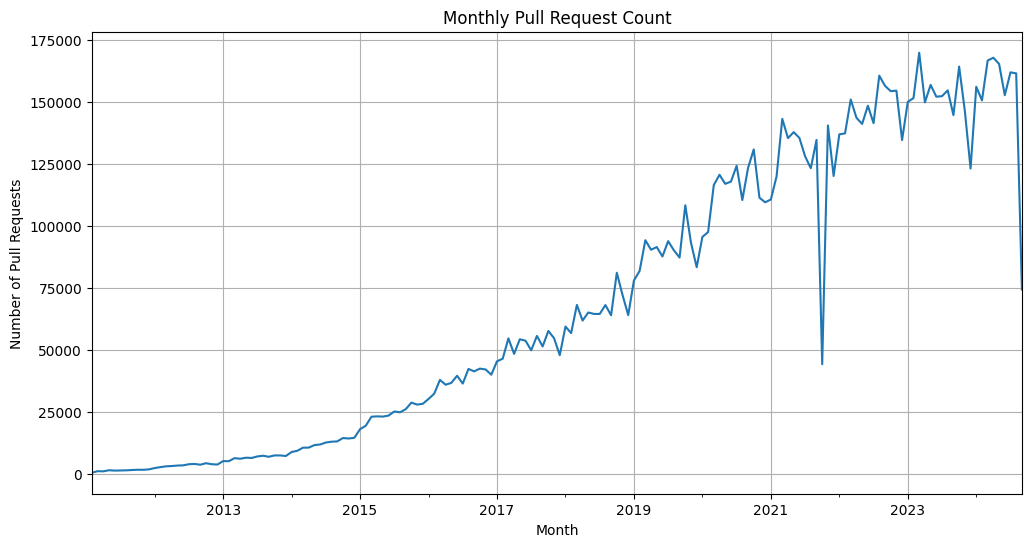

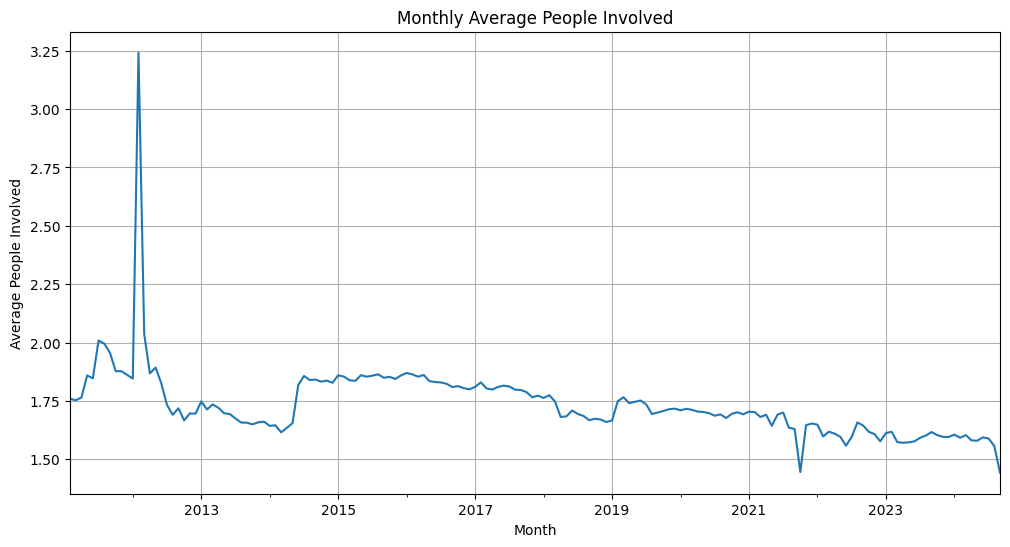

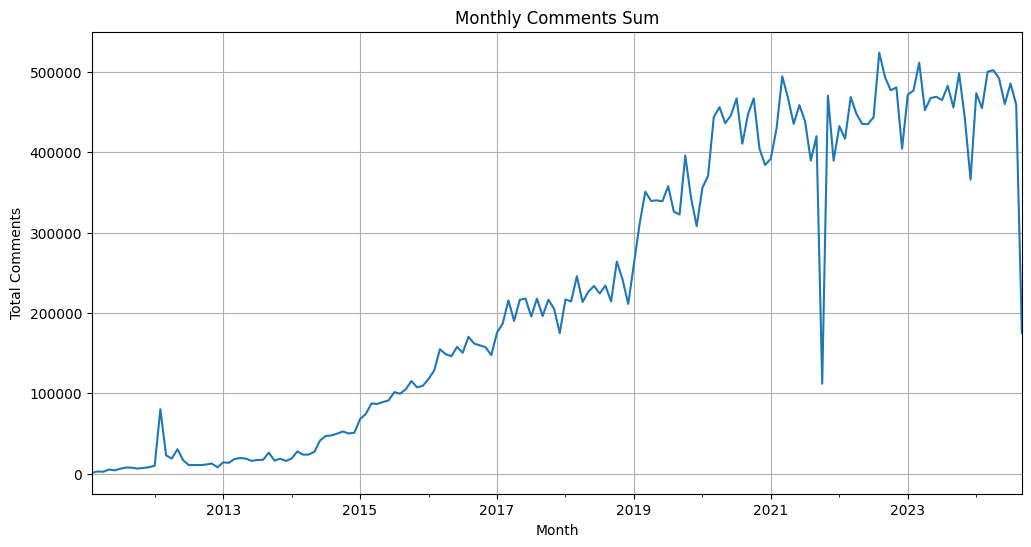

In [ ]:
plt.figure(figsize=(12, 6))
monthly_pr_count.plot(title='Monthly Pull Request Count')
plt.xlabel('Month')
plt.ylabel('Number of Pull Requests')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
monthly_avg_people_involved.plot(title='Monthly Average People Involved')
plt.xlabel('Month')
plt.ylabel('Average People Involved')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
monthly_comments_sum.plot(title='Monthly Comments Sum')
plt.xlabel('Month')
plt.ylabel('Total Comments')
plt.grid(True)
plt.show()


In [ ]:
df_repo_login = pd.read_csv('repo_name_login.csv')

top_accounts = df_repo_login['login'].head(10).tolist()

['microsoft', 'google', 'apache', 'facebookresearch', 'fossasia', 'sindresorhus', 'alibaba', 'facebook', 'azure', 'awslabs']


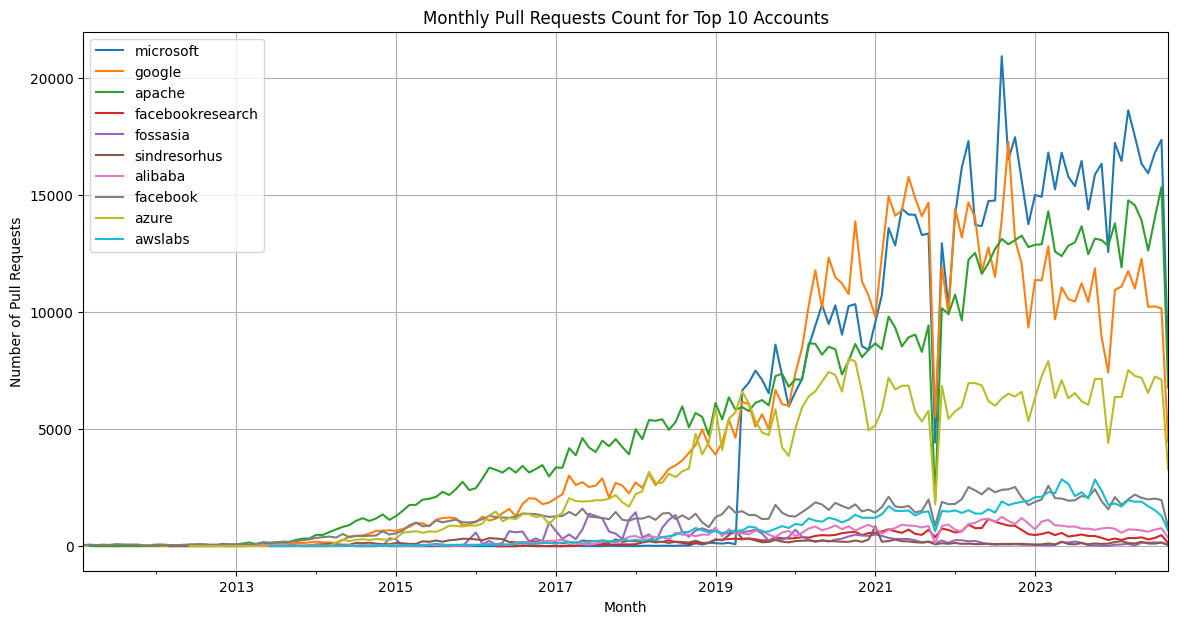

In [ ]:
filtered_dfs = {account: df_pull_requests[df_pull_requests['repo_name'].str.contains(account)] for account in top_accounts}

monthly_counts = {account: df.resample('M').size() for account, df in filtered_dfs.items()}

plt.figure(figsize=(14, 7))
for account, counts in monthly_counts.items():
    counts.plot(label=account)

plt.title('Monthly Pull Requests Count for Top 10 Accounts')
plt.xlabel('Month')
plt.ylabel('Number of Pull Requests')
plt.legend()
plt.grid(True)
plt.show()

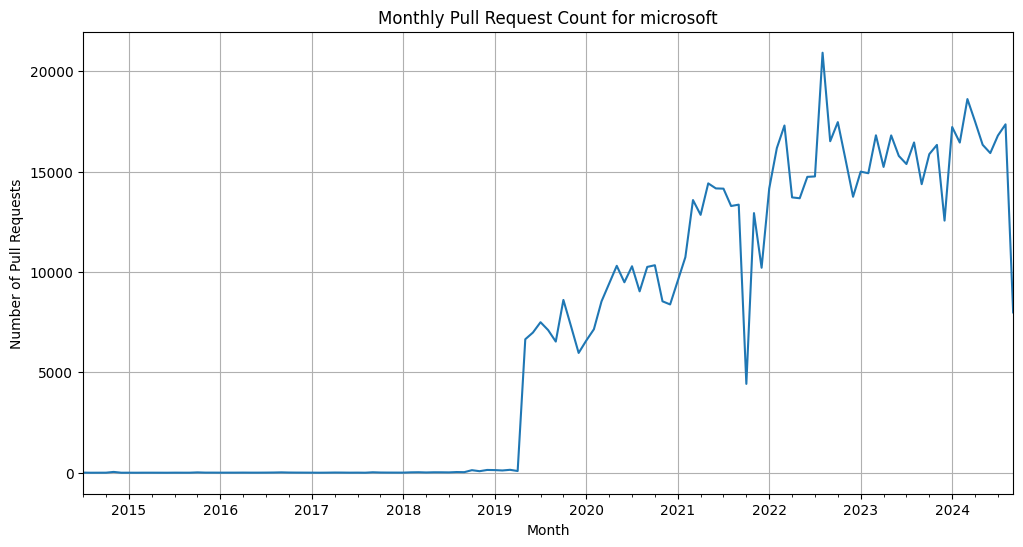

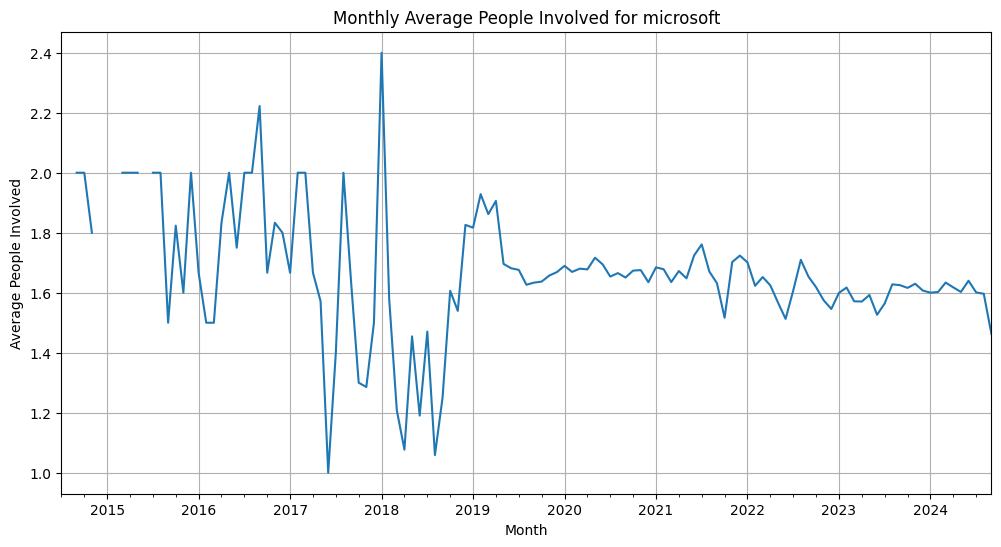

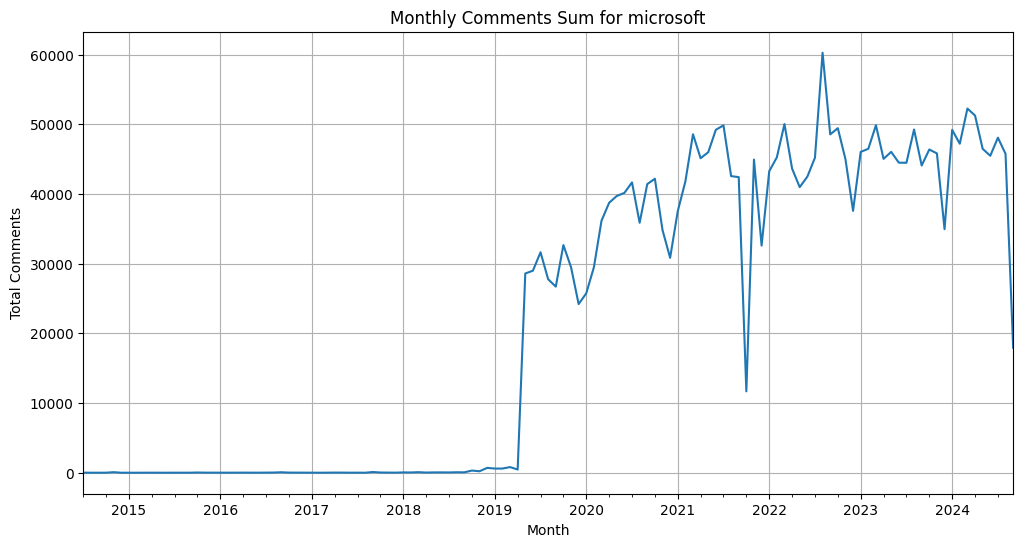

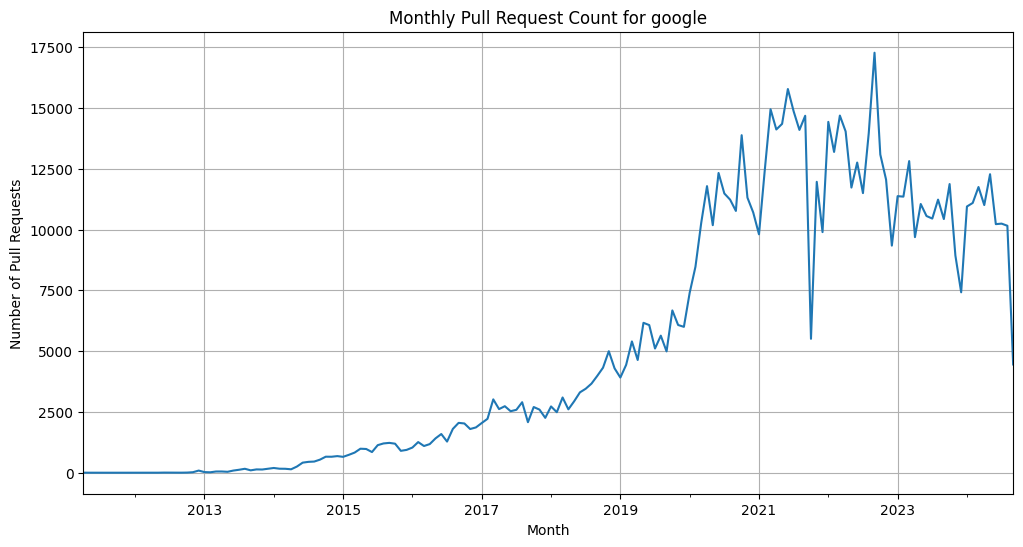

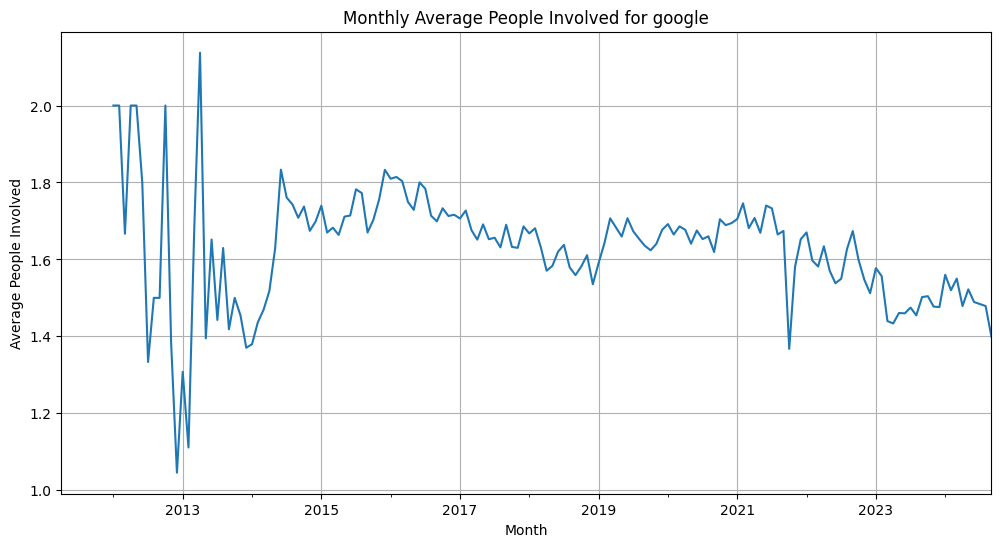

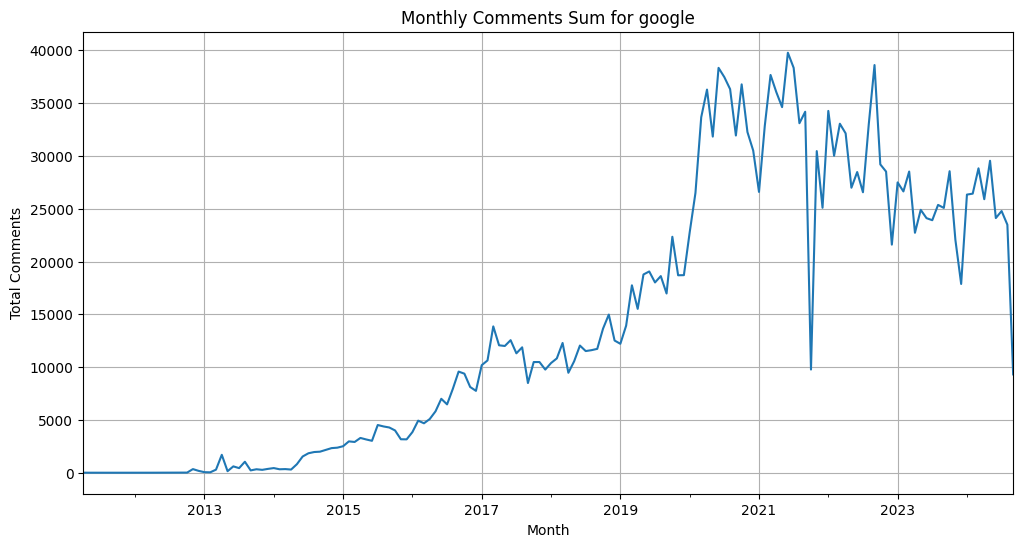

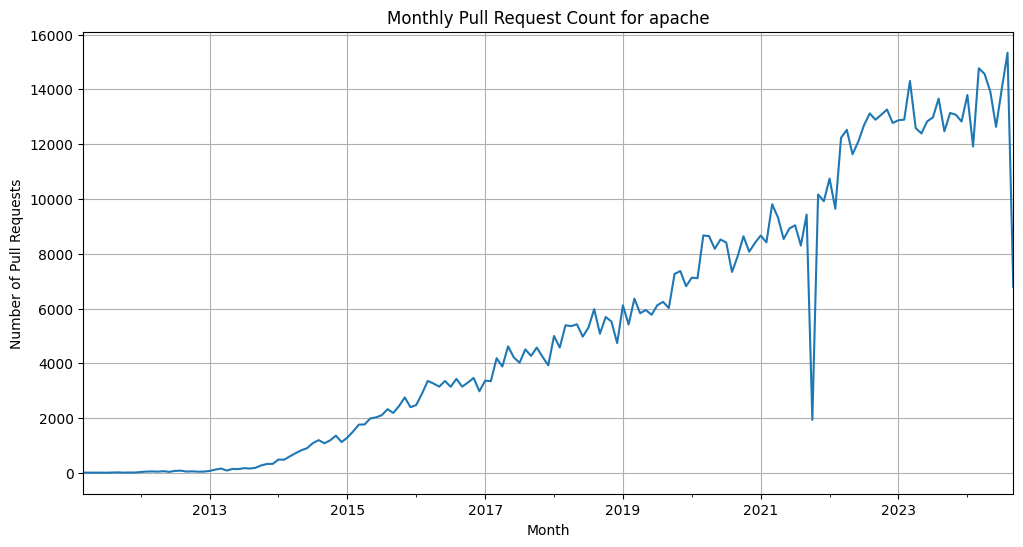

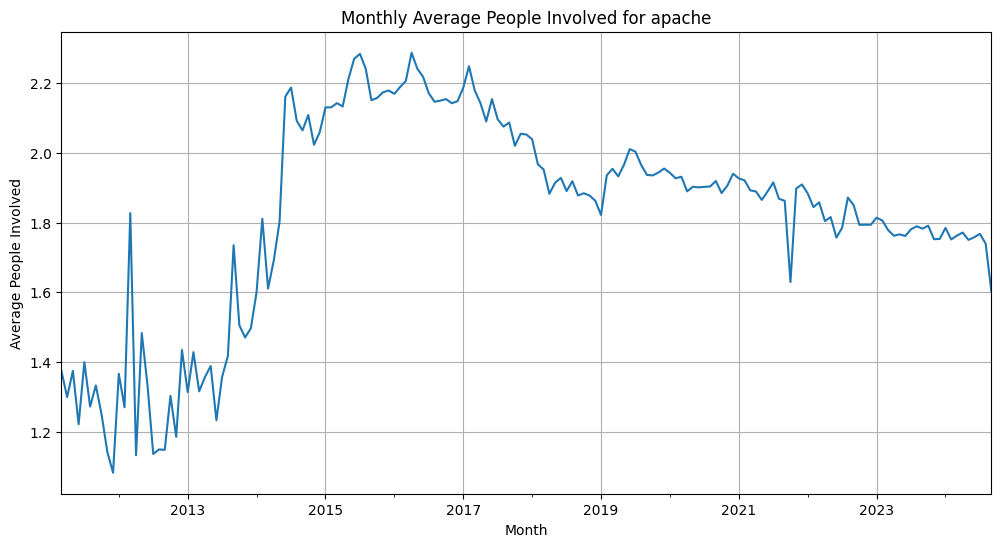

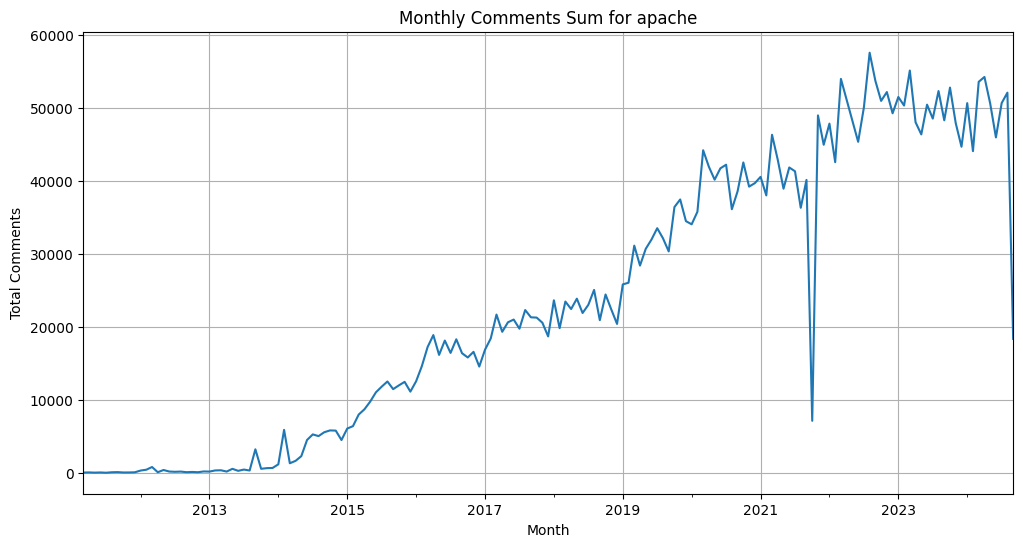

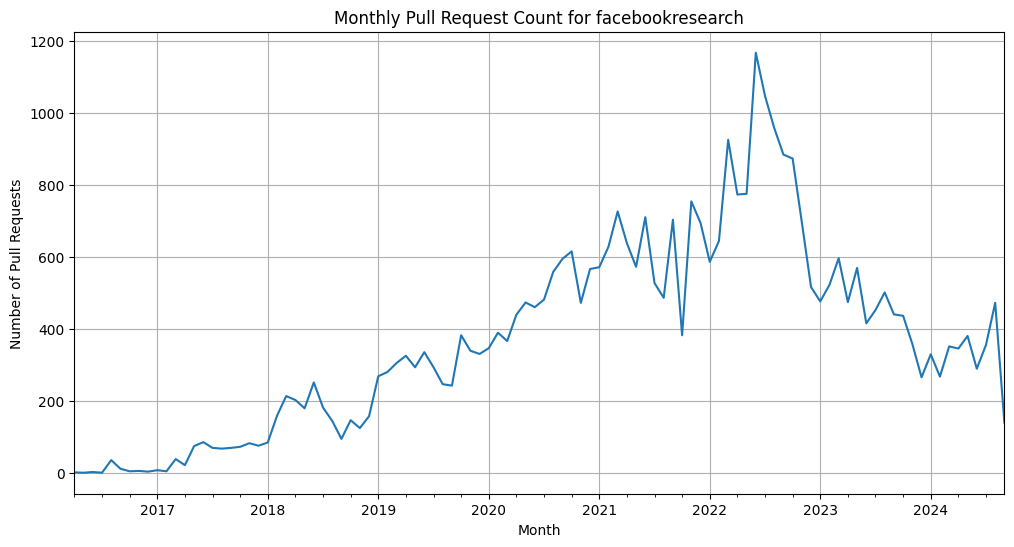

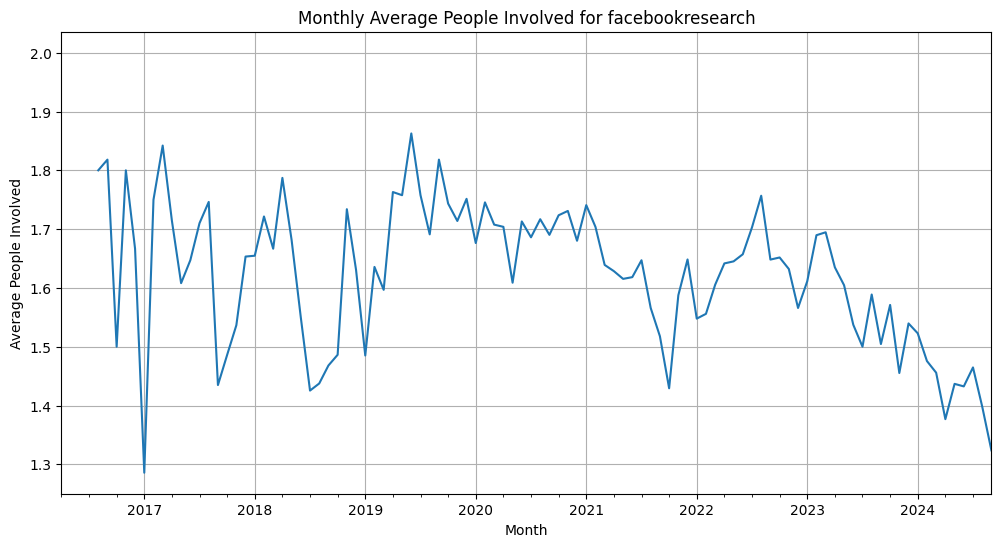

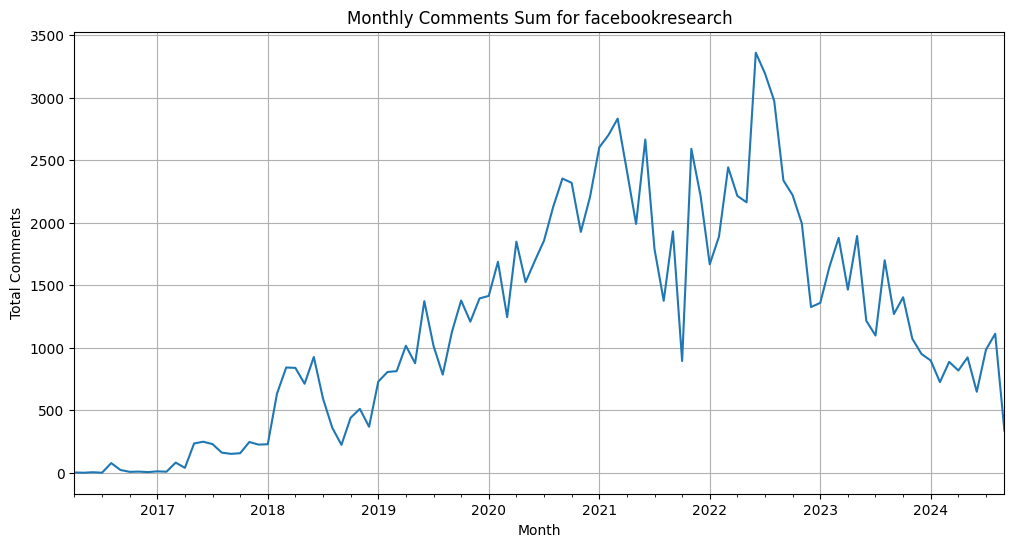

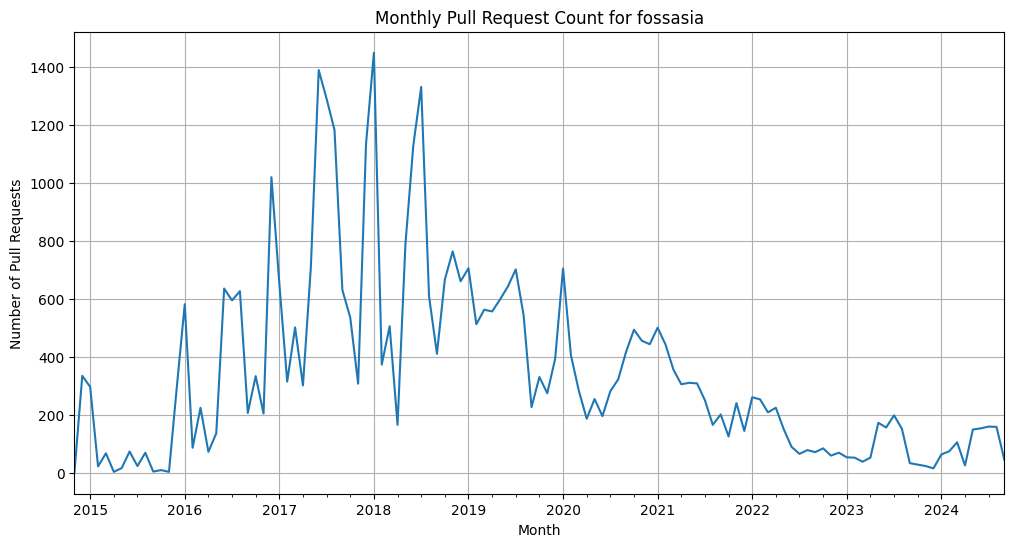

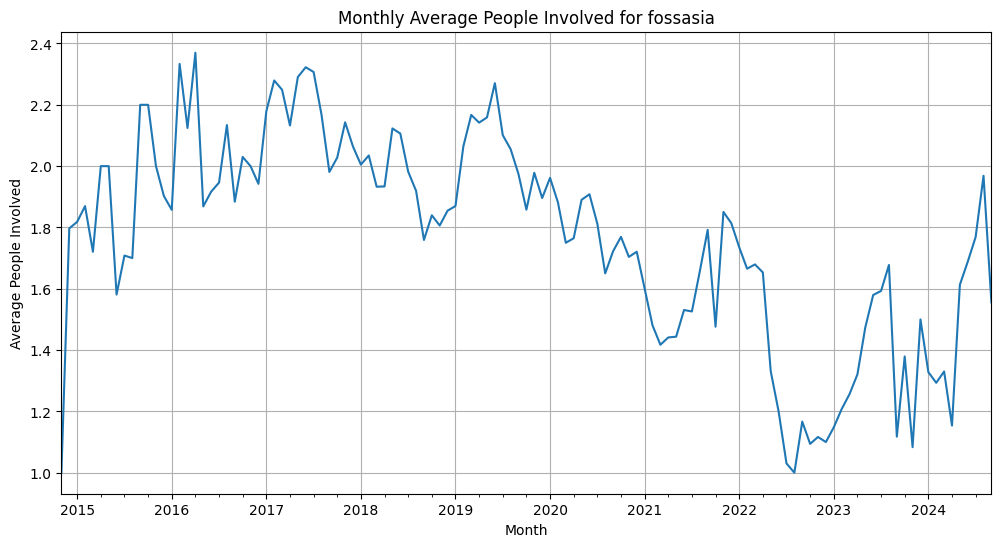

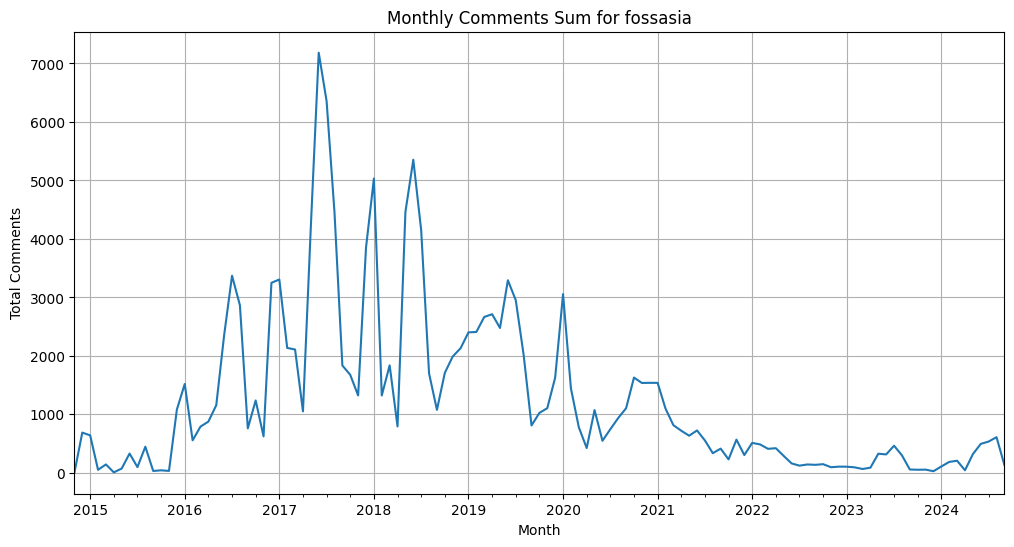

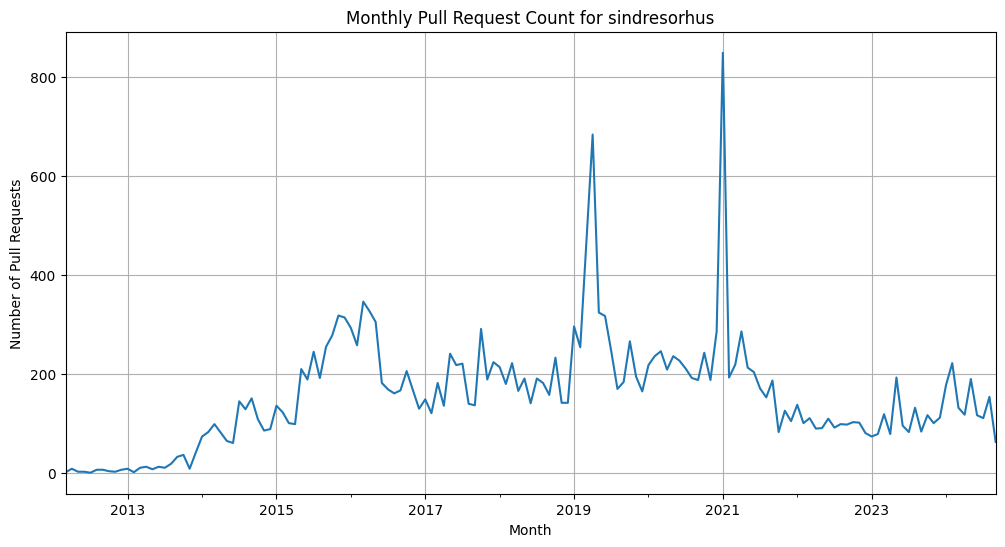

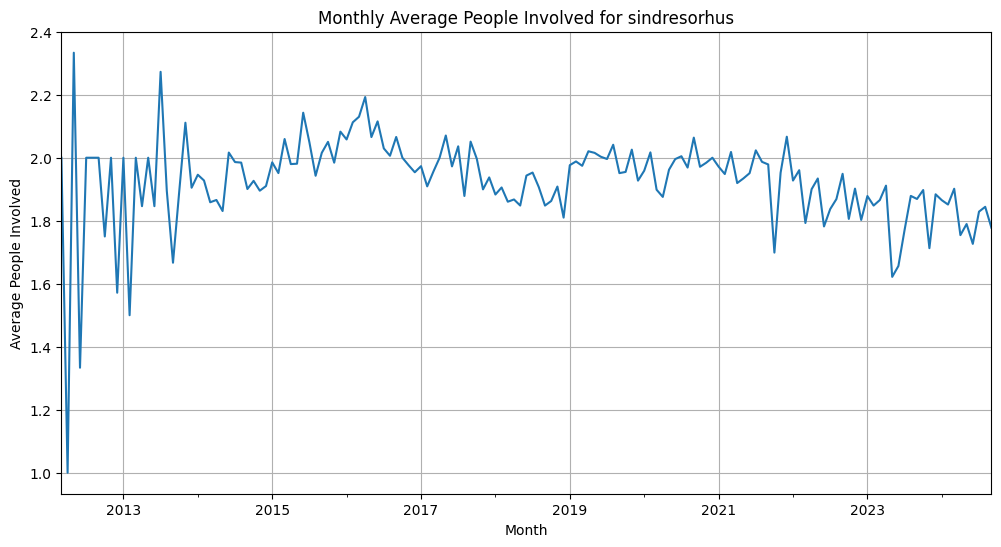

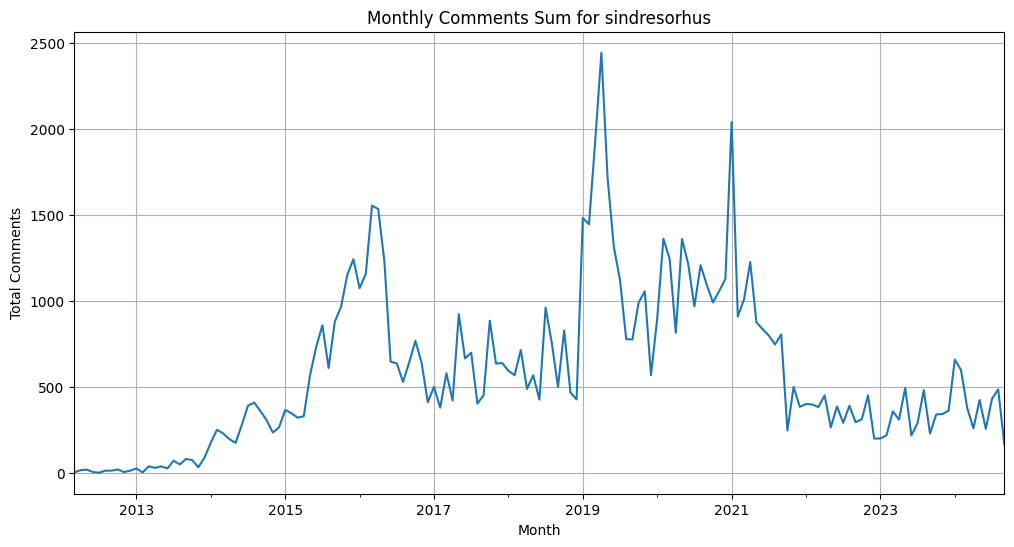

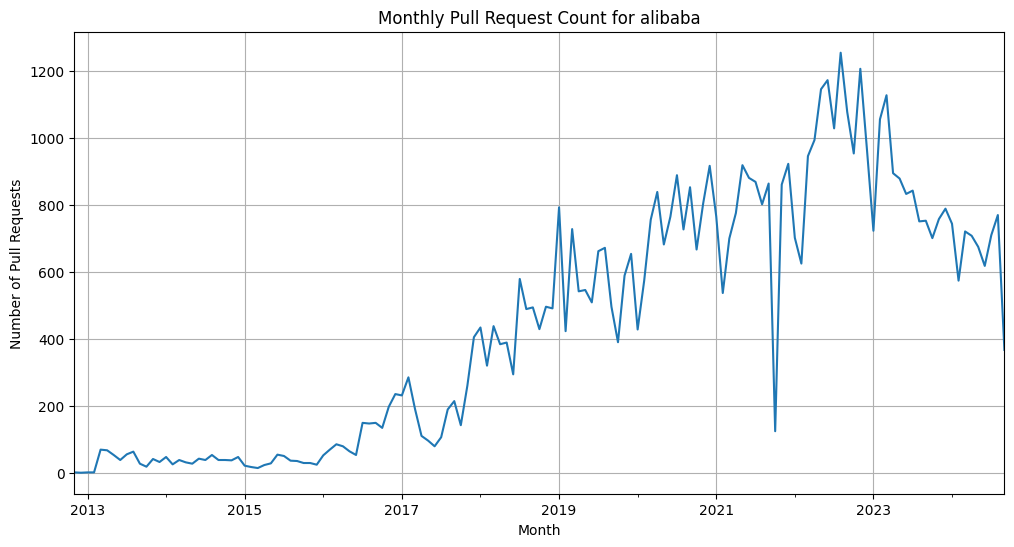

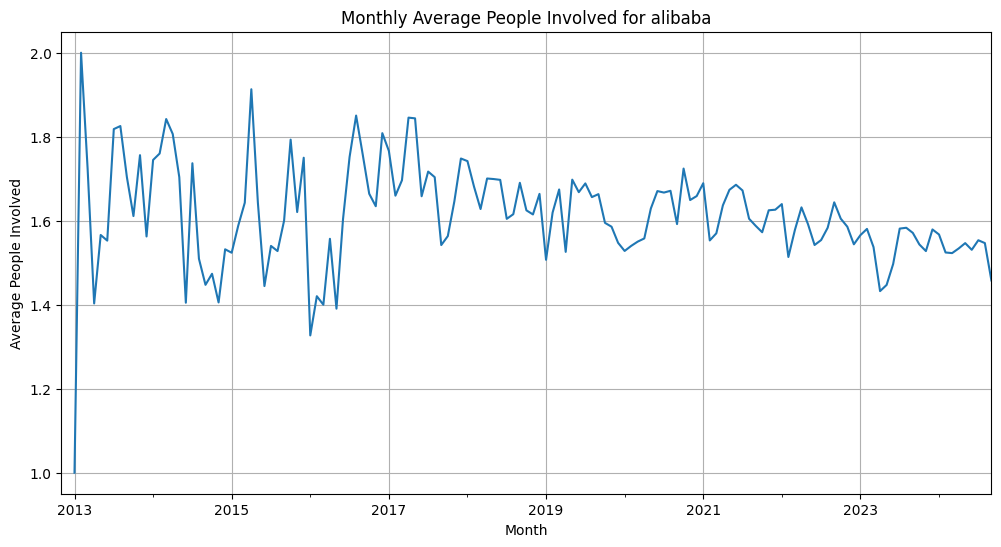

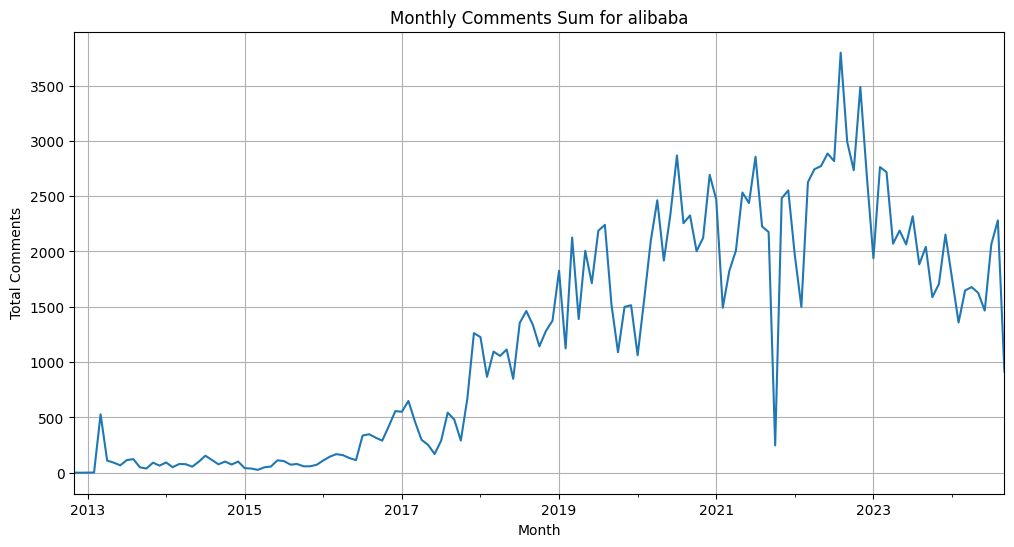

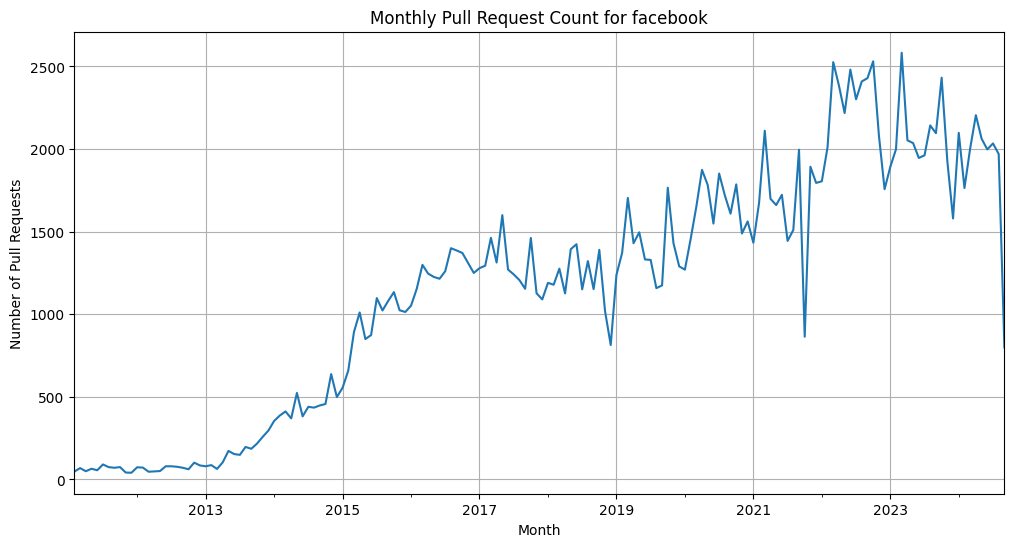

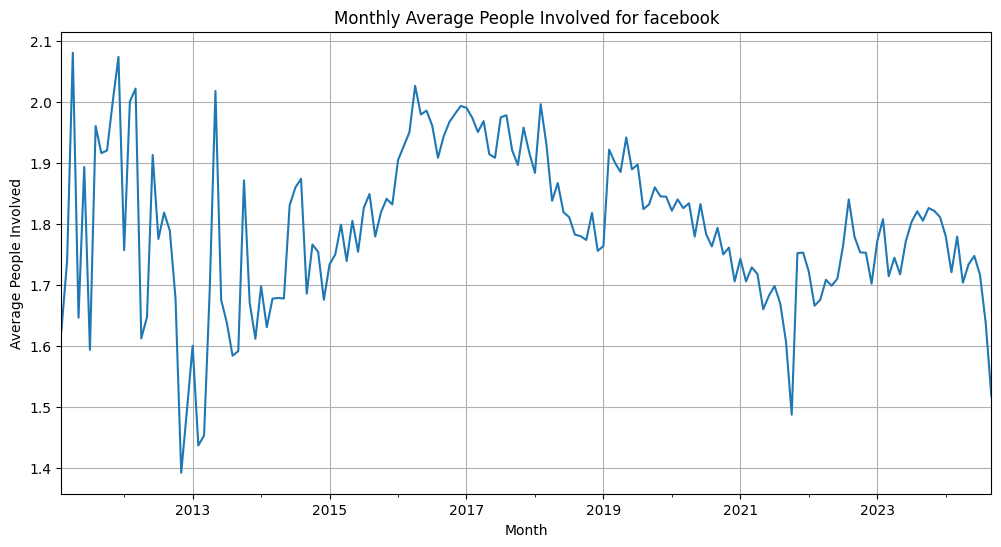

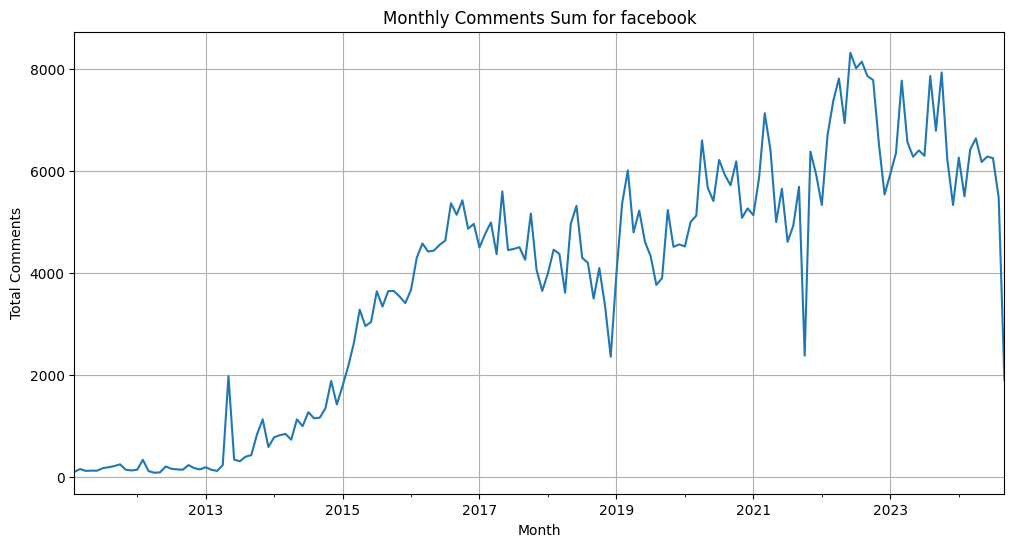

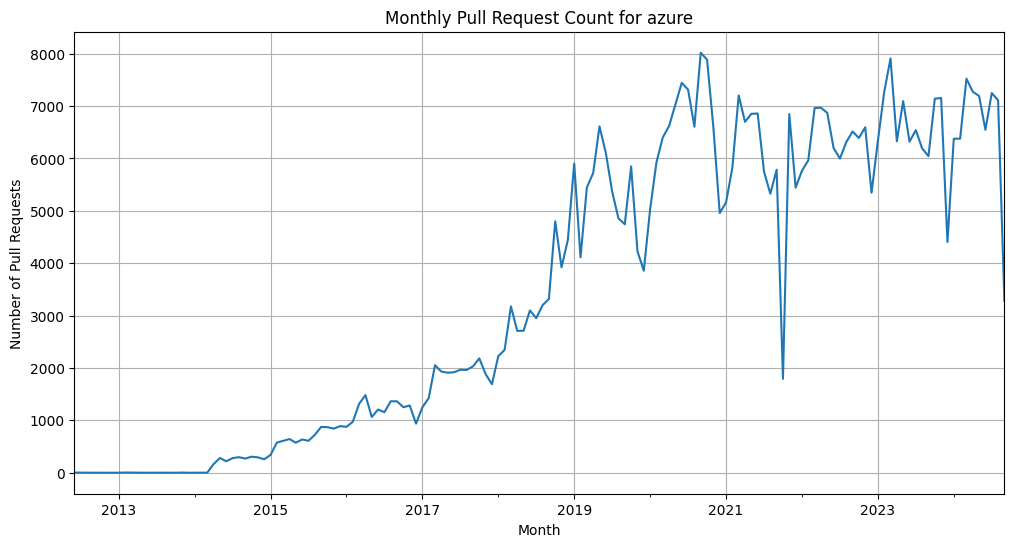

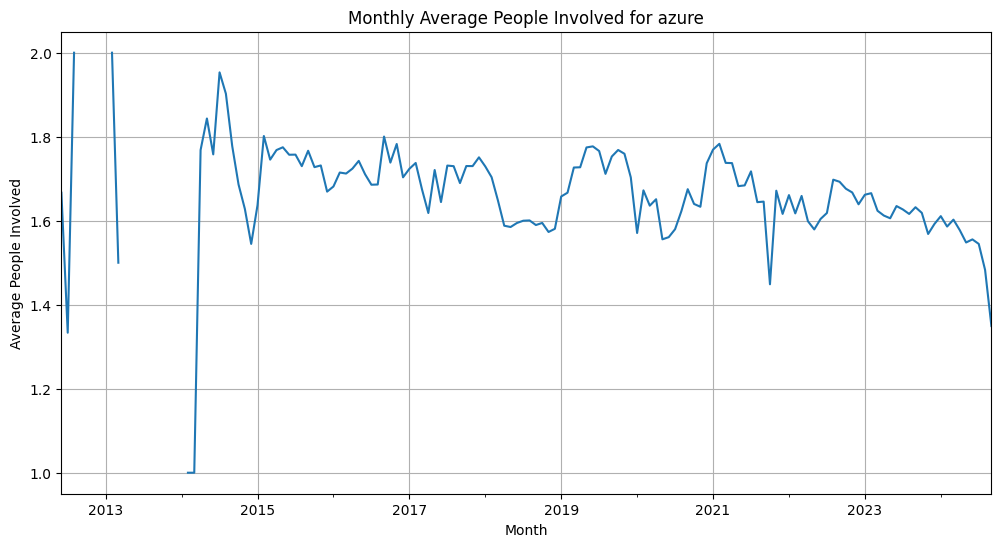

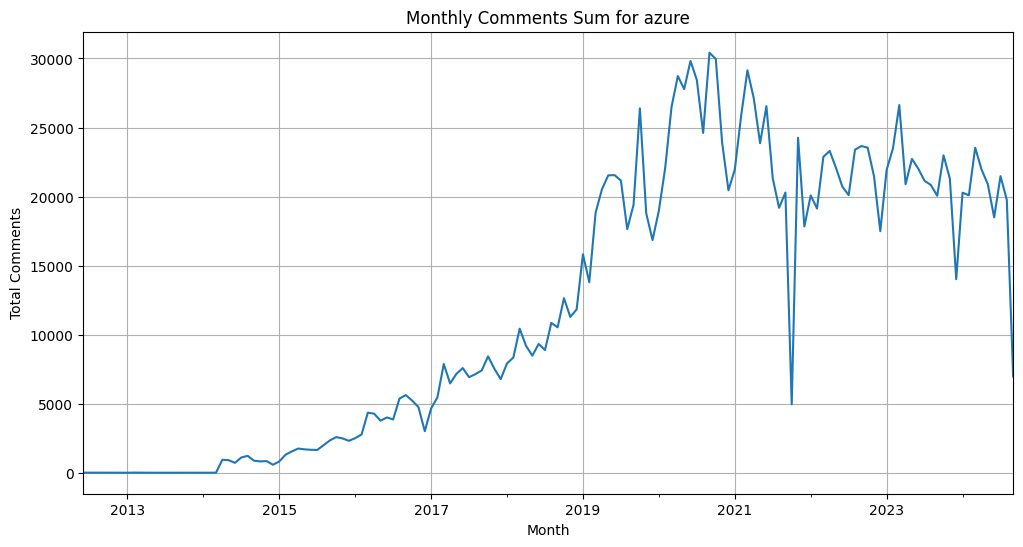

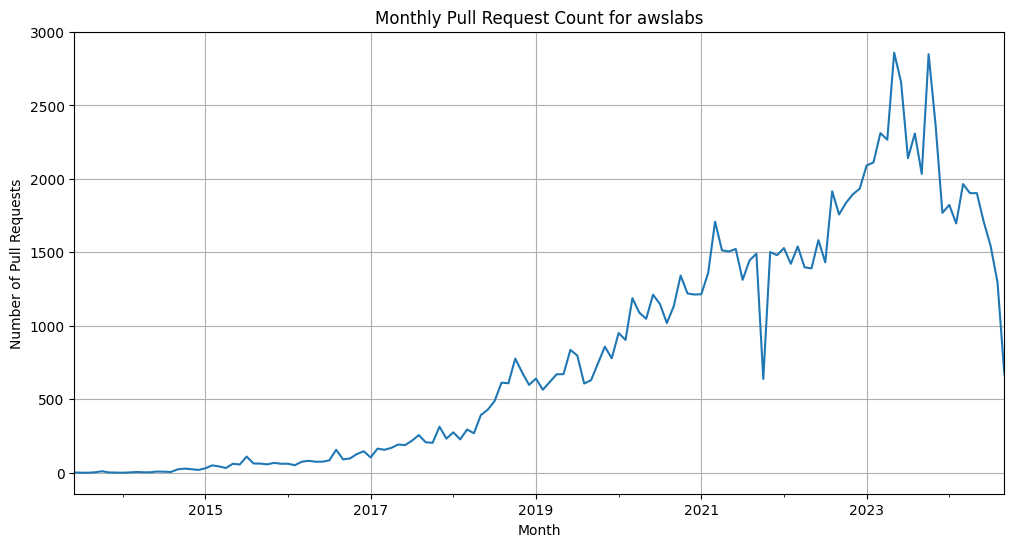

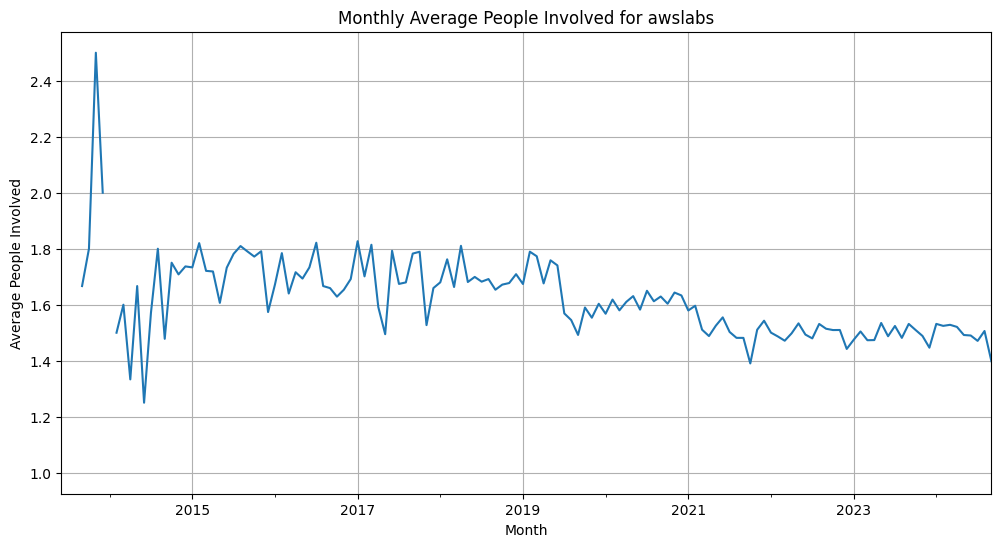

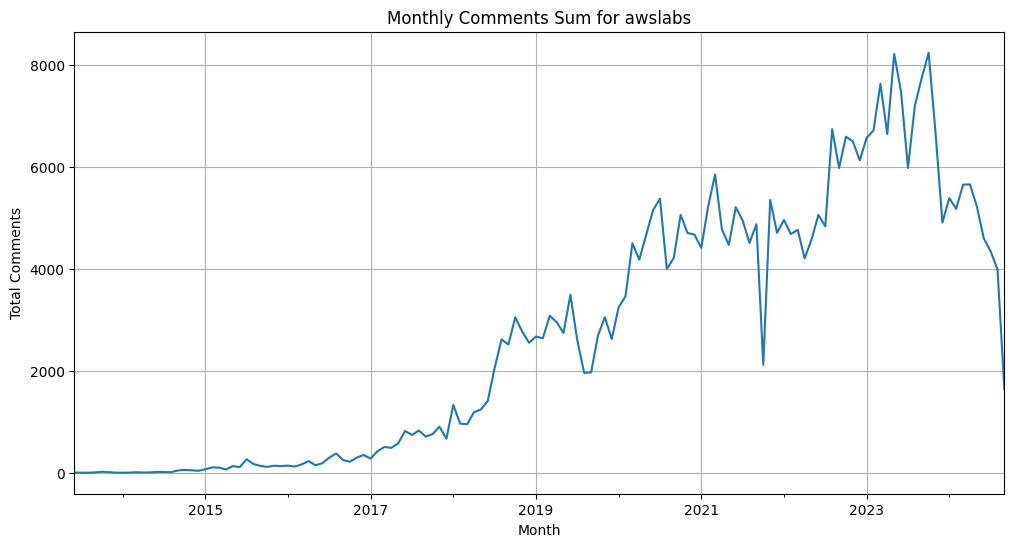

In [ ]:
for account in top_accounts:
    account_df = df_pull_requests[df_pull_requests['repo_name'].str.contains(account)]

    monthly_pr_count = account_df.resample('M').size()
    monthly_avg_people_involved = account_df['involved_people'].resample('M').mean()
    monthly_comments_sum = account_df['number_of_comments'].resample('M').sum()

    plt.figure(figsize=(12, 6))
    monthly_pr_count.plot(title=f'Monthly Pull Request Count for {account}')
    plt.xlabel('Month')
    plt.ylabel('Number of Pull Requests')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(12, 6))
    monthly_avg_people_involved.plot(title=f'Monthly Average People Involved for {account}')
    plt.xlabel('Month')
    plt.ylabel('Average People Involved')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(12, 6))
    monthly_comments_sum.plot(title=f'Monthly Comments Sum for {account}')
    plt.xlabel('Month')
    plt.ylabel('Total Comments')
    plt.grid(True)
    plt.show()

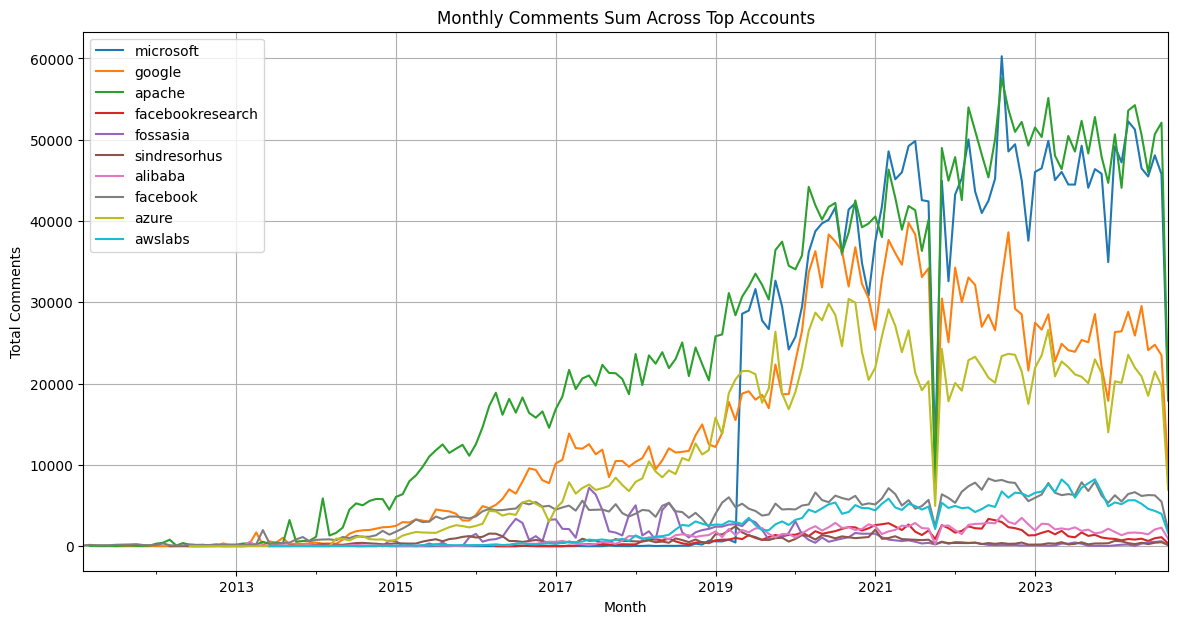

In [ ]:
monthly_pr_counts = {}
monthly_avg_people_involved = {}
monthly_comments_sums = {}

for account in top_accounts:
    account_df = df_pull_requests[df_pull_requests['repo_name'].str.contains(account)]

    monthly_pr_counts[account] = account_df.resample('M').size()
    monthly_avg_people_involved[account] = account_df['involved_people'].resample('M').mean()
    monthly_comments_sums[account] = account_df['number_of_comments'].resample('M').sum()

plt.figure(figsize=(14, 7))
for account, counts in monthly_pr_counts.items():
    counts.plot(label=account)
plt.title('Monthly Pull Request Count Across Top Accounts')
plt.xlabel('Month')
plt.ylabel('Number of Pull Requests')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 7))
for account, avg_people in monthly_avg_people_involved.items():
    avg_people.plot(label=account)
plt.title('Monthly Average People Involved Across Top Accounts')
plt.xlabel('Month')
plt.ylabel('Average People Involved')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 7))
for account, comments in monthly_comments_sums.items():
    comments.plot(label=account)
plt.title('Monthly Comments Sum Across Top Accounts')
plt.xlabel('Month')
plt.ylabel('Total Comments')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
def top_ten_monthly(df, metric):
    """Group by 'calendar_month' and get top ten for the specified metric, including repo name."""
    top_ten = df.groupby('calendar_month').apply(lambda x: x.nlargest(10, metric)[['account_name', metric]])
    top_ten.reset_index(level=0, drop=True, inplace=True)
    return top_ten

for metric in metrics:
    top_ten_data = top_ten_monthly(df_account_level, metric)
    print(f"Top ten data for {metric} per month including repo names:")
    print(top_ten_data)
    print("\n")

Top ten data for aggregate_commit_count per month including repo names:
                       account_name  aggregate_commit_count
calendar_month                                             
2011-02-01                 facebook                    1308
2011-02-01                jenkinsci                    1139
2011-02-01                   github                     832
2011-02-01                  mozilla                     824
2011-02-01                    rails                     670
...                             ...                     ...
2024-09-01                   dotnet                   46982
2024-09-01      googlecloudplatform                   40579
2024-09-01                rust-lang                   40133
2024-09-01                  datadog                   39746
2024-09-01                   google                   39572

[1640 rows x 2 columns]


Top ten data for repository_count per month including repo names:
                       account_name  repository_count
c

In [ ]:
df_account_level['calendar_month'] = pd.to_datetime(df_account_level['calendar_month'], format='%Y%m')

df_account_level.set_index('calendar_month', inplace=True)

df_microsoft = df_account_level[df_account_level['account_name'] == 'microsoft']

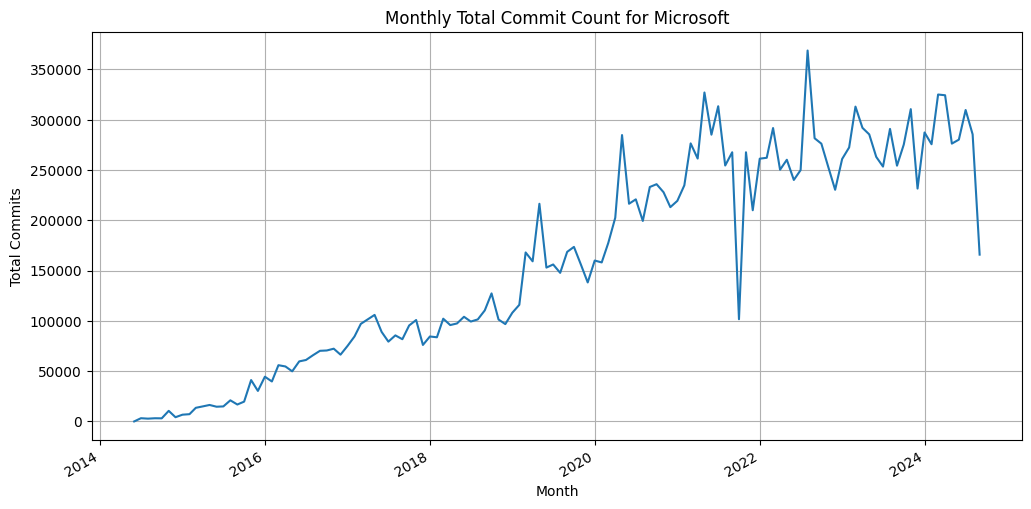

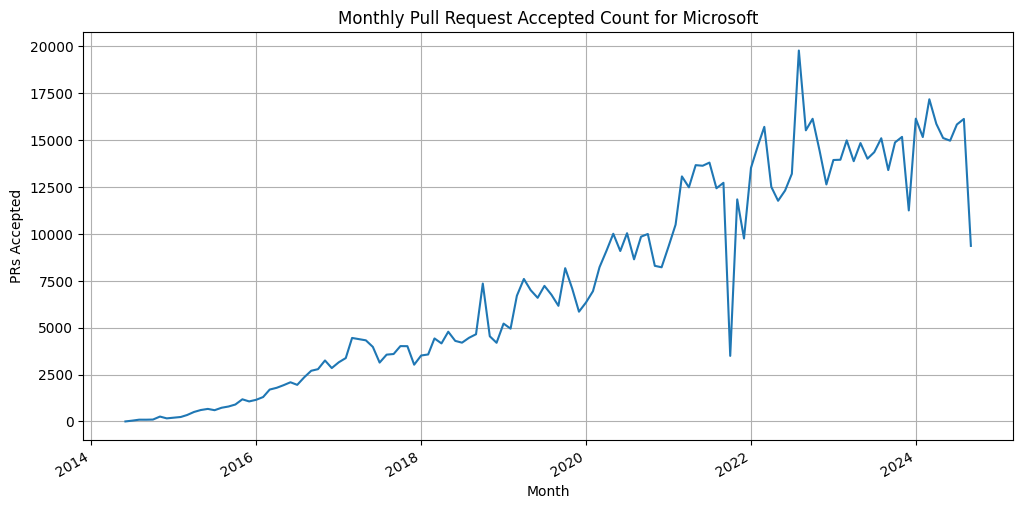

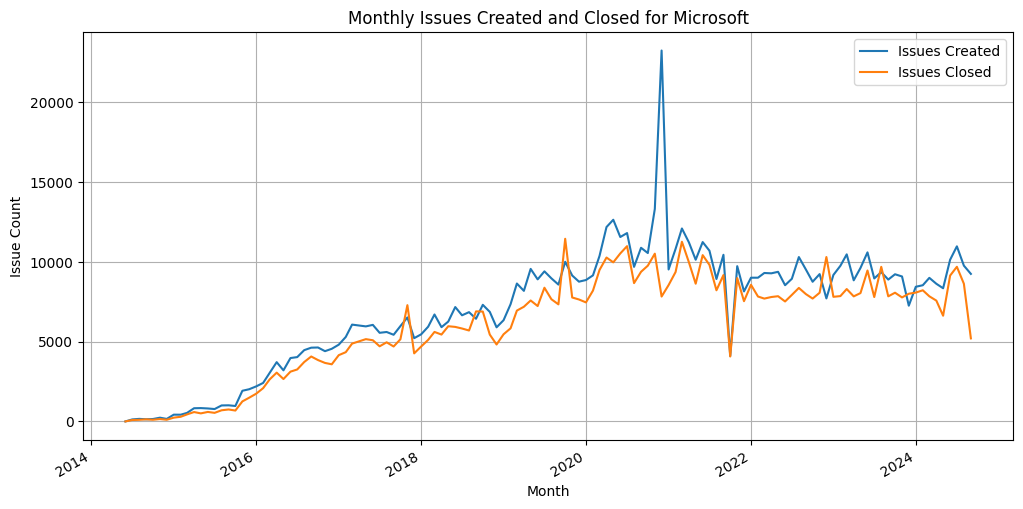

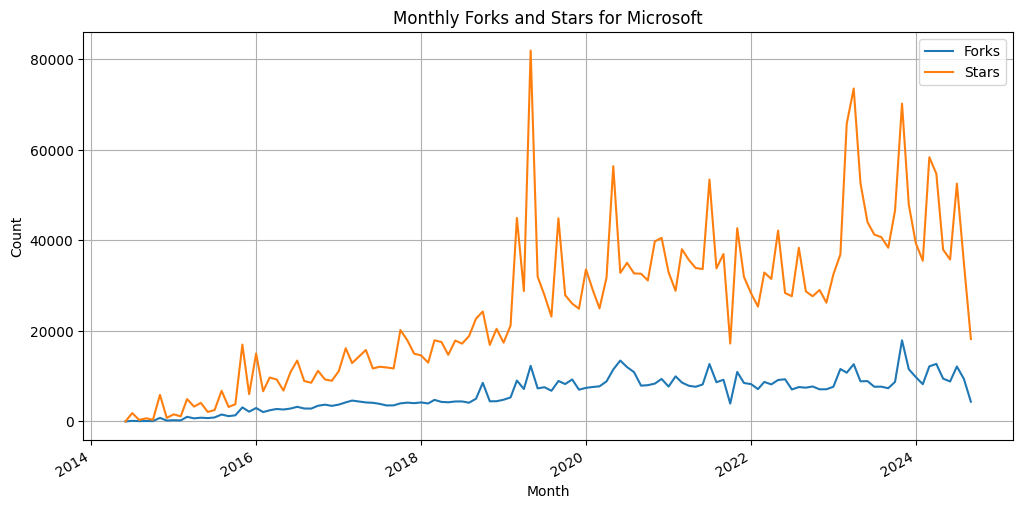

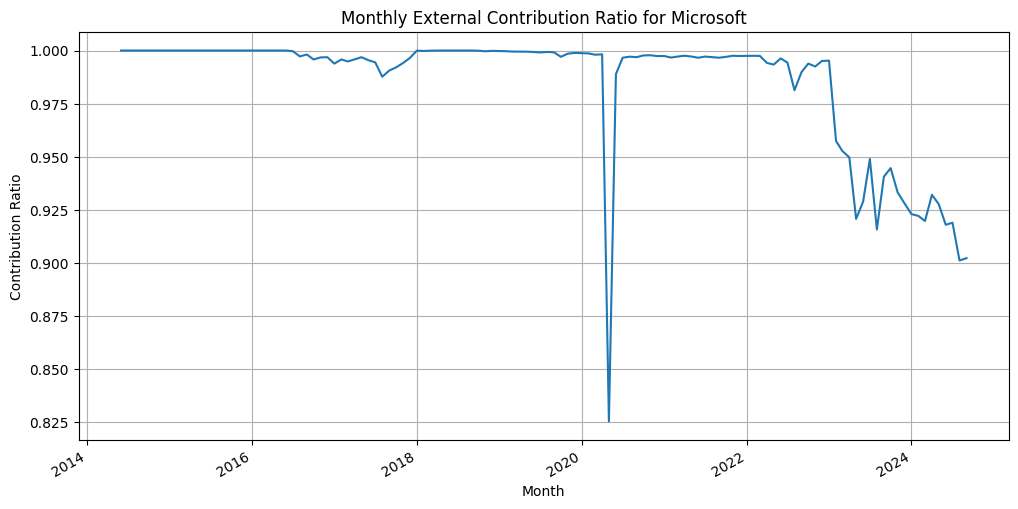

In [ ]:
plt.figure(figsize=(12, 6))
df_microsoft['aggregate_commit_count'].plot(title='Monthly Total Commit Count for Microsoft')
plt.xlabel('Month')
plt.ylabel('Total Commits')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
df_microsoft['pull_request_accepted_count'].plot(title='Monthly Pull Request Accepted Count for Microsoft')
plt.xlabel('Month')
plt.ylabel('PRs Accepted')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
df_microsoft['issues_created_count'].plot(label='Issues Created')
df_microsoft['issues_closed_count'].plot(label='Issues Closed')
plt.title('Monthly Issues Created and Closed for Microsoft')
plt.xlabel('Month')
plt.ylabel('Issue Count')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
df_microsoft['fork_count'].plot(label='Forks')
df_microsoft['star_count'].plot(label='Stars')
plt.title('Monthly Forks and Stars for Microsoft')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
df_microsoft['releases_count'].plot(title='Monthly Releases for Microsoft')
plt.xlabel('Month')
plt.ylabel('Releases Count')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
df_microsoft['external_contribution_ratio'].plot(title='Monthly External Contribution Ratio for Microsoft')
plt.xlabel('Month')
plt.ylabel('Contribution Ratio')
plt.grid(True)
plt.show()

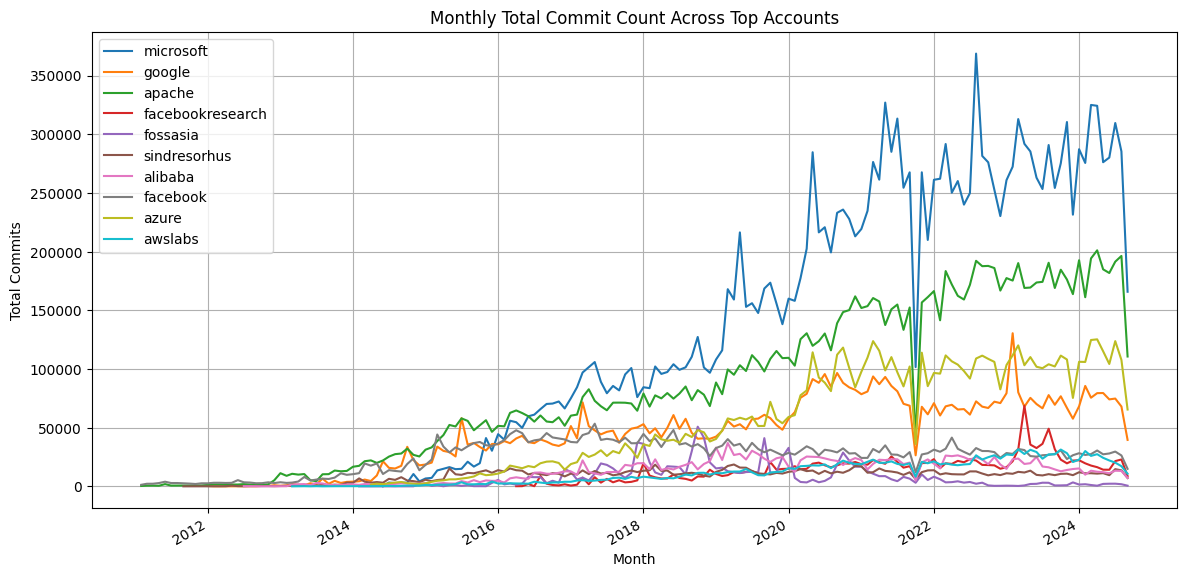

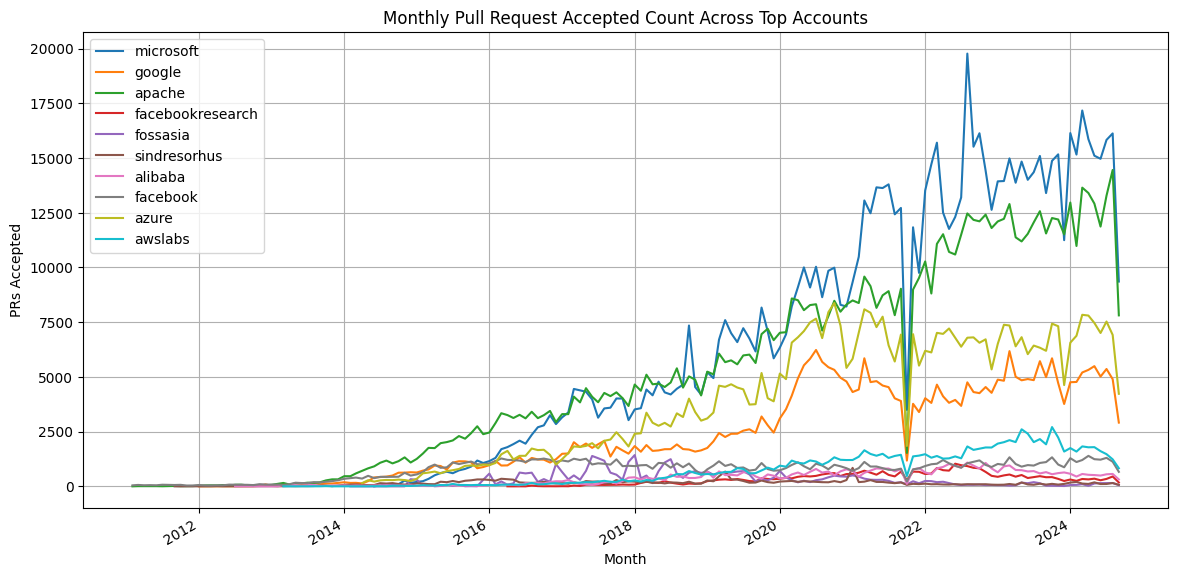

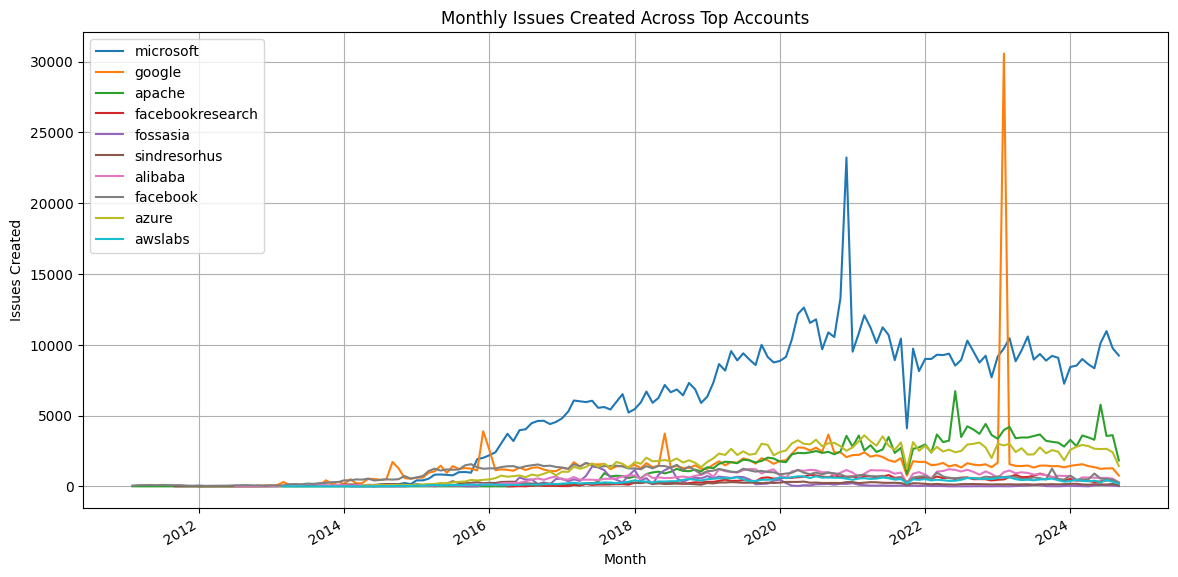

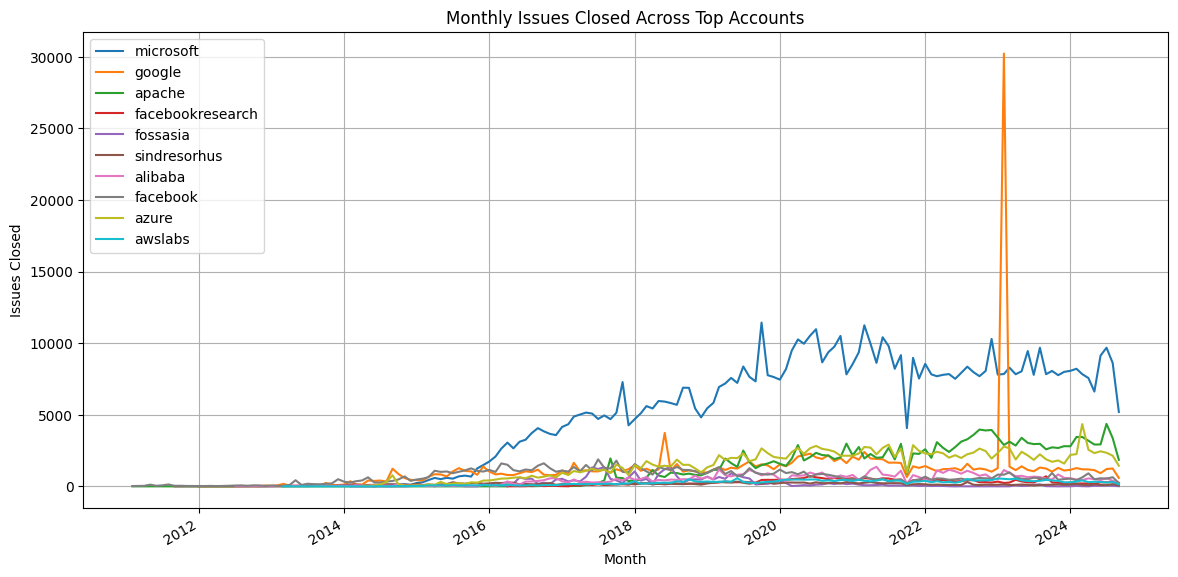

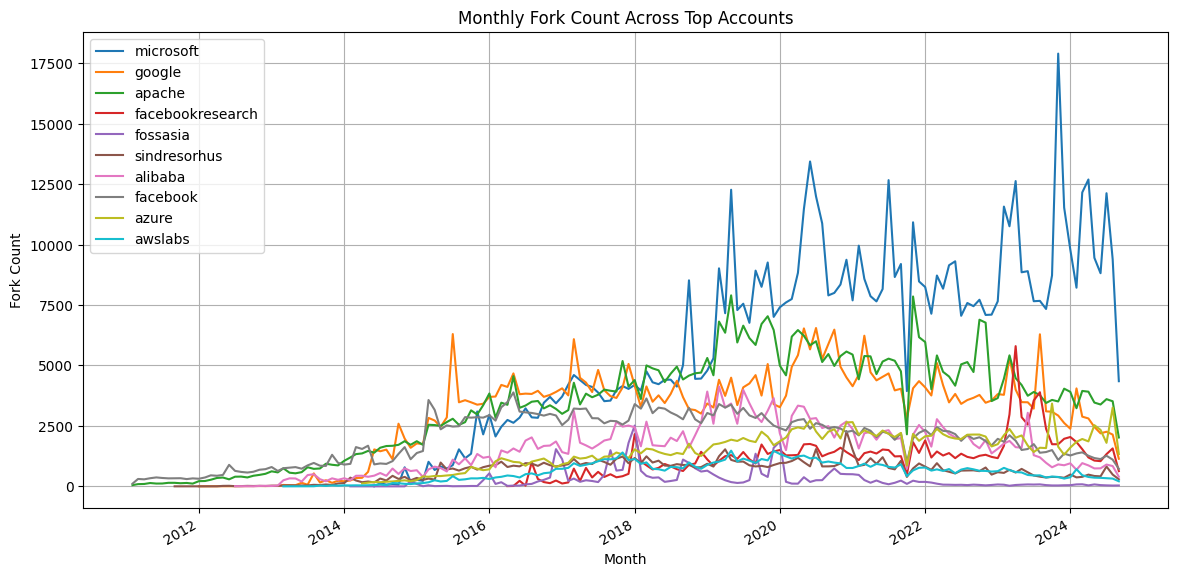

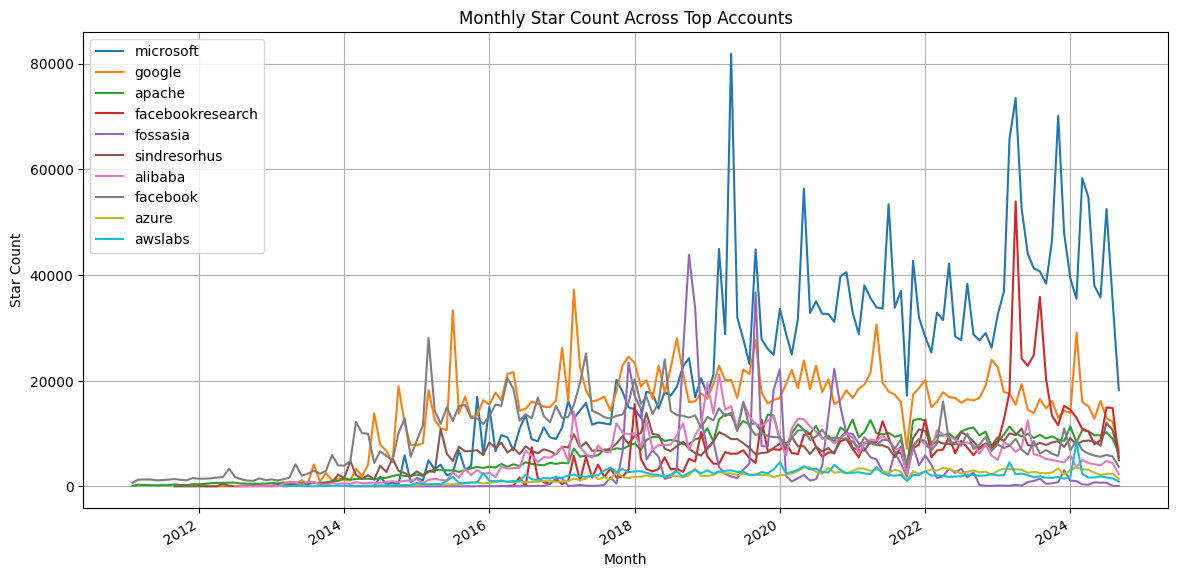

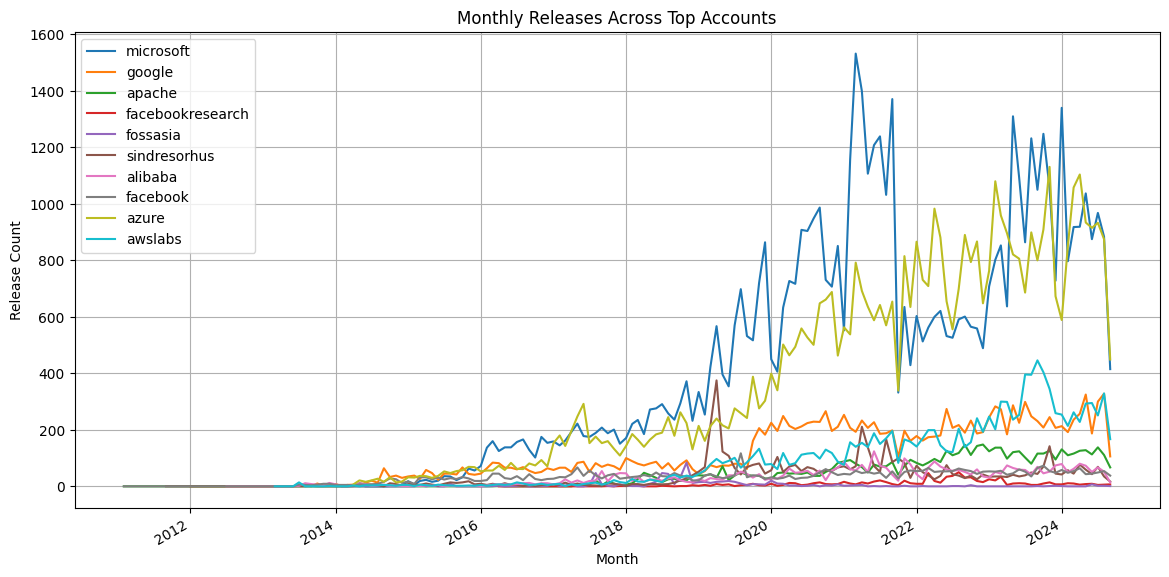

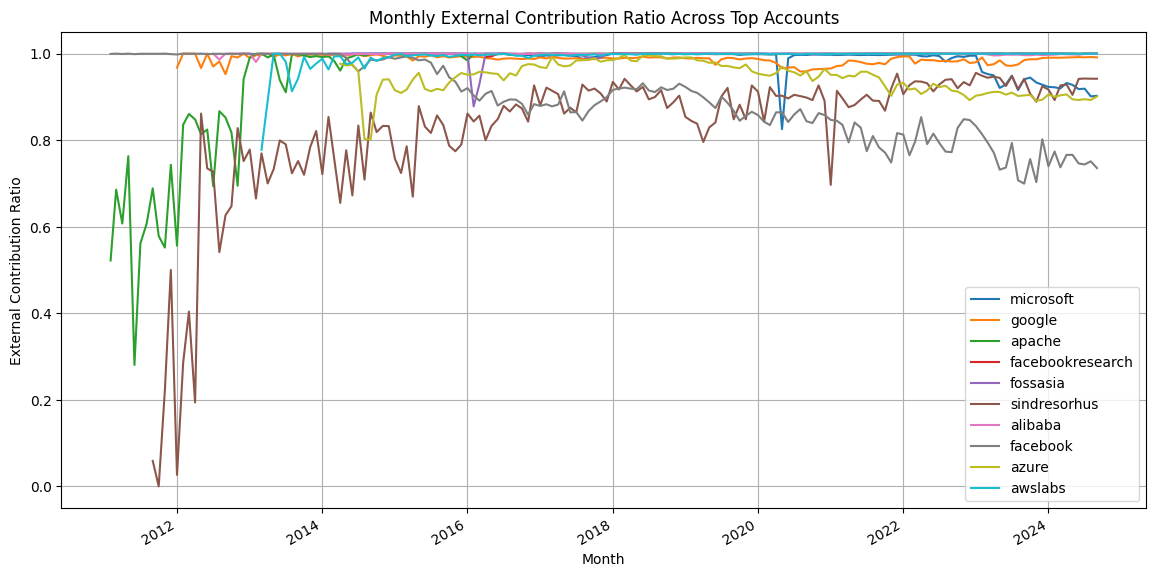

In [ ]:
plt.figure(figsize=(14, 7))
for account in top_accounts:
    account_data = df_account_level[df_account_level['account_name'] == account]
    account_data['aggregate_commit_count'].plot(label=account)
plt.title('Monthly Total Commit Count Across Top Accounts')
plt.xlabel('Month')
plt.ylabel('Total Commits')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 7))
for account in top_accounts:
    account_data = df_account_level[df_account_level['account_name'] == account]
    account_data['pull_request_accepted_count'].plot(label=account)
plt.title('Monthly Pull Request Accepted Count Across Top Accounts')
plt.xlabel('Month')
plt.ylabel('PRs Accepted')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 7))
for account in top_accounts:
    account_data = df_account_level[df_account_level['account_name'] == account]
    account_data['issues_created_count'].plot(label=account)
plt.title('Monthly Issues Created Across Top Accounts')
plt.xlabel('Month')
plt.ylabel('Issues Created')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 7))
for account in top_accounts:
    account_data = df_account_level[df_account_level['account_name'] == account]
    account_data['issues_closed_count'].plot(label=account)
plt.title('Monthly Issues Closed Across Top Accounts')
plt.xlabel('Month')
plt.ylabel('Issues Closed')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 7))
for account in top_accounts:
    account_data = df_account_level[df_account_level['account_name'] == account]
    account_data['fork_count'].plot(label=account)
plt.title('Monthly Fork Count Across Top Accounts')
plt.xlabel('Month')
plt.ylabel('Fork Count')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 7))
for account in top_accounts:
    account_data = df_account_level[df_account_level['account_name'] == account]
    account_data['star_count'].plot(label=account)
plt.title('Monthly Star Count Across Top Accounts')
plt.xlabel('Month')
plt.ylabel('Star Count')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 7))
for account in top_accounts:
    account_data = df_account_level[df_account_level['account_name'] == account]
    account_data['releases_count'].plot(label=account)
plt.title('Monthly Releases Across Top Accounts')
plt.xlabel('Month')
plt.ylabel('Release Count')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 7))
for account in top_accounts:
    account_data = df_account_level[df_account_level['account_name'] == account]
    account_data['external_contribution_ratio'].plot(label=account)
plt.title('Monthly External Contribution Ratio Across Top Accounts')
plt.xlabel('Month')
plt.ylabel('External Contribution Ratio')
plt.legend()
plt.grid(True)
plt.show()

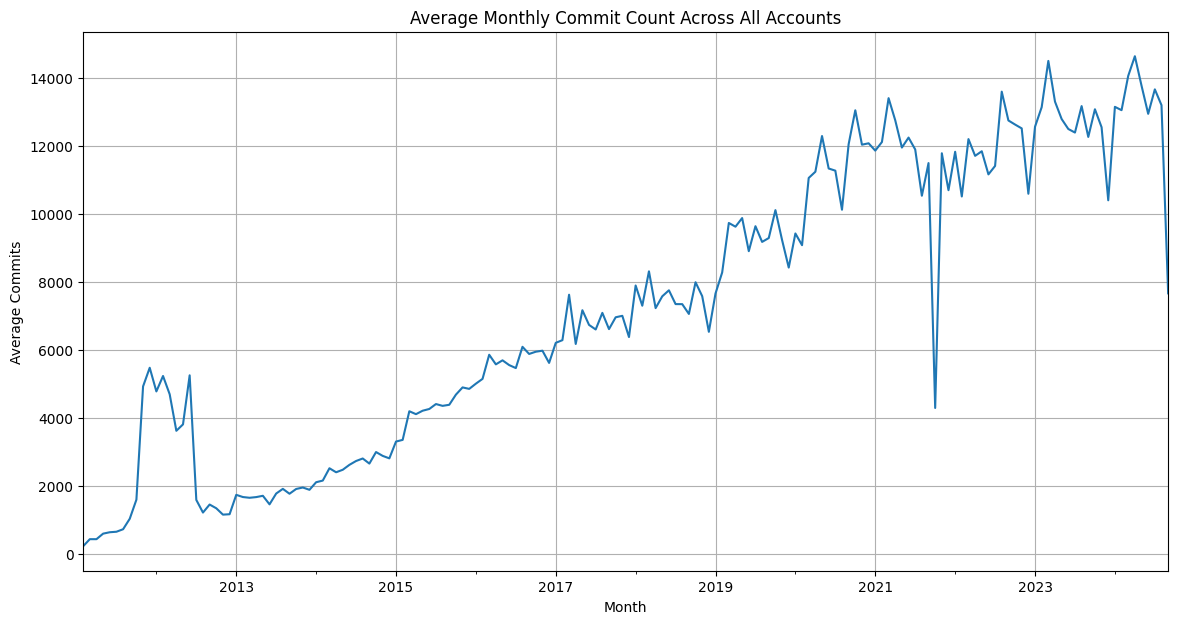

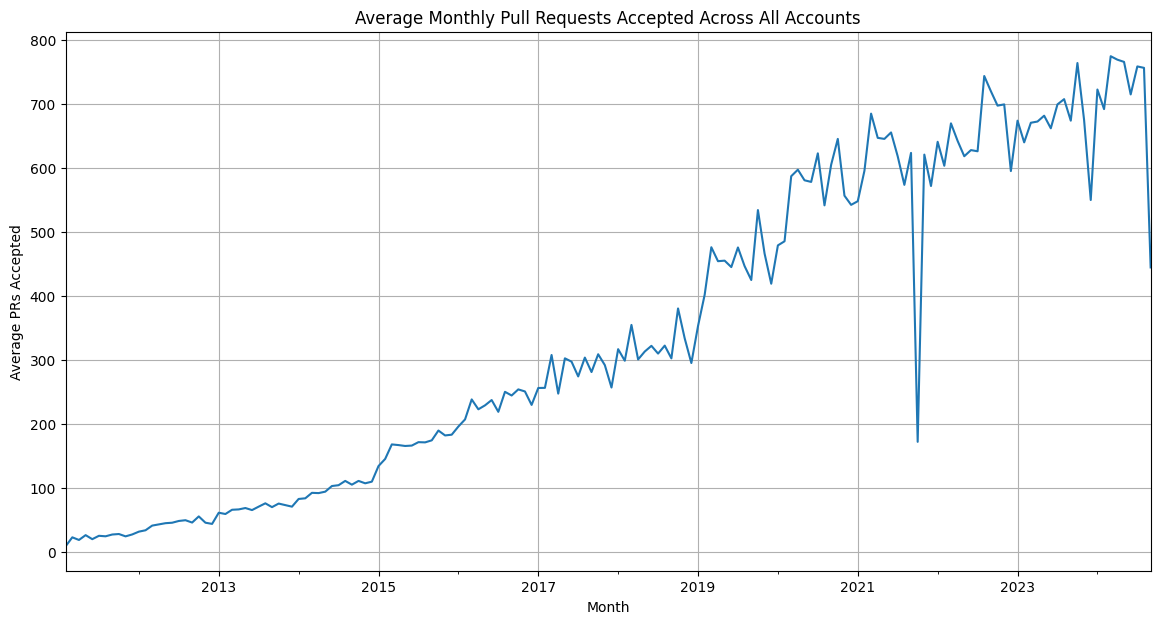

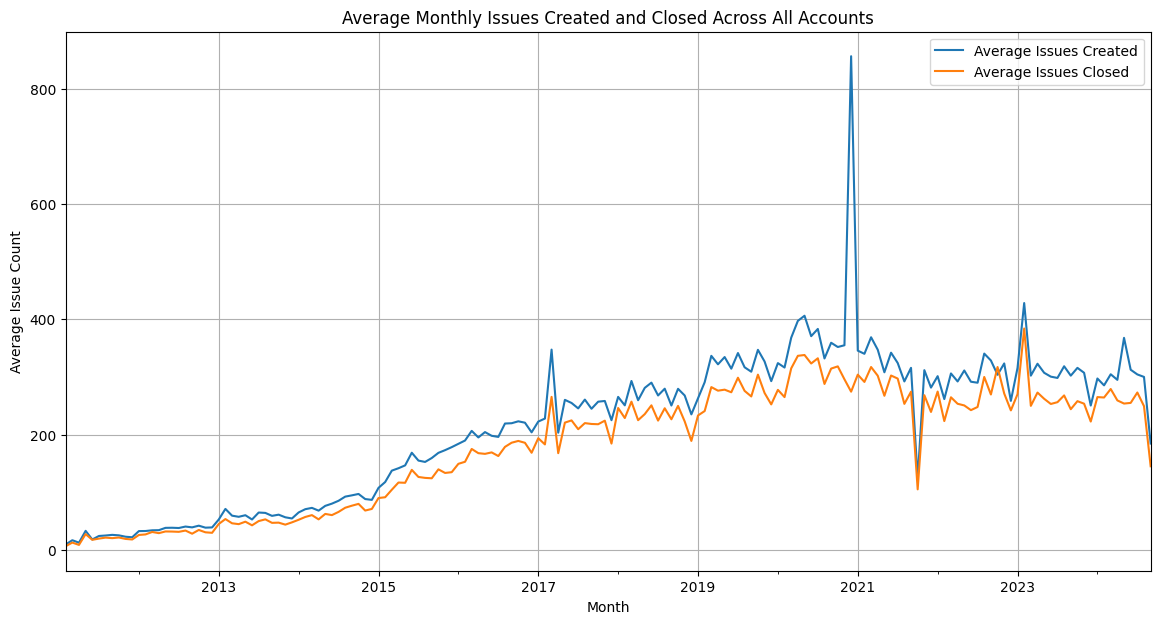

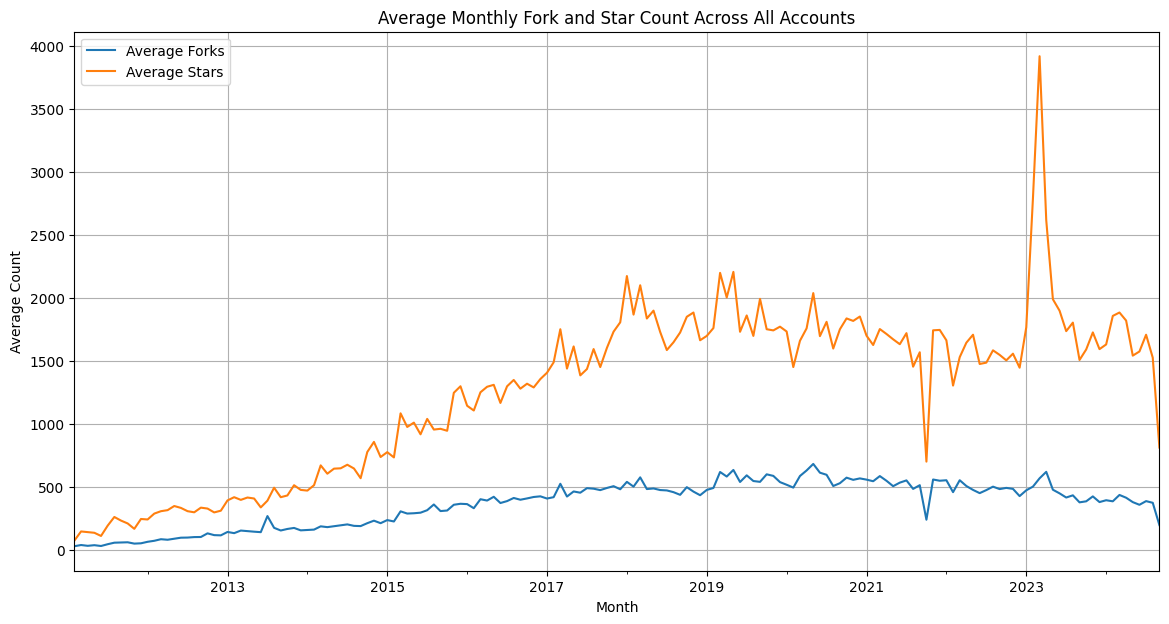

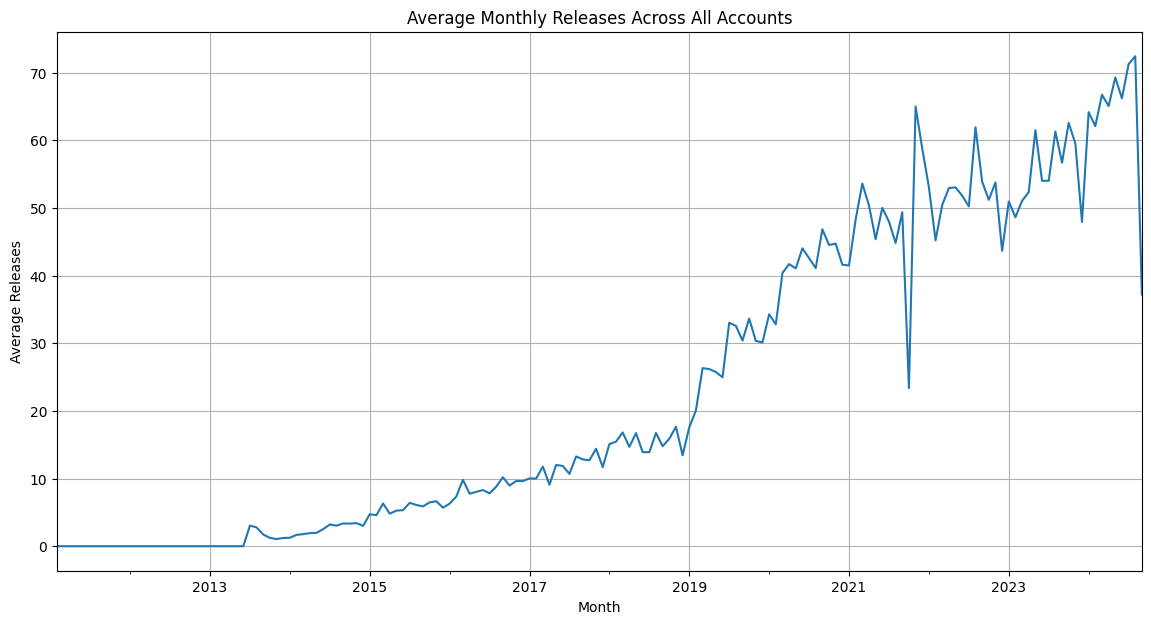

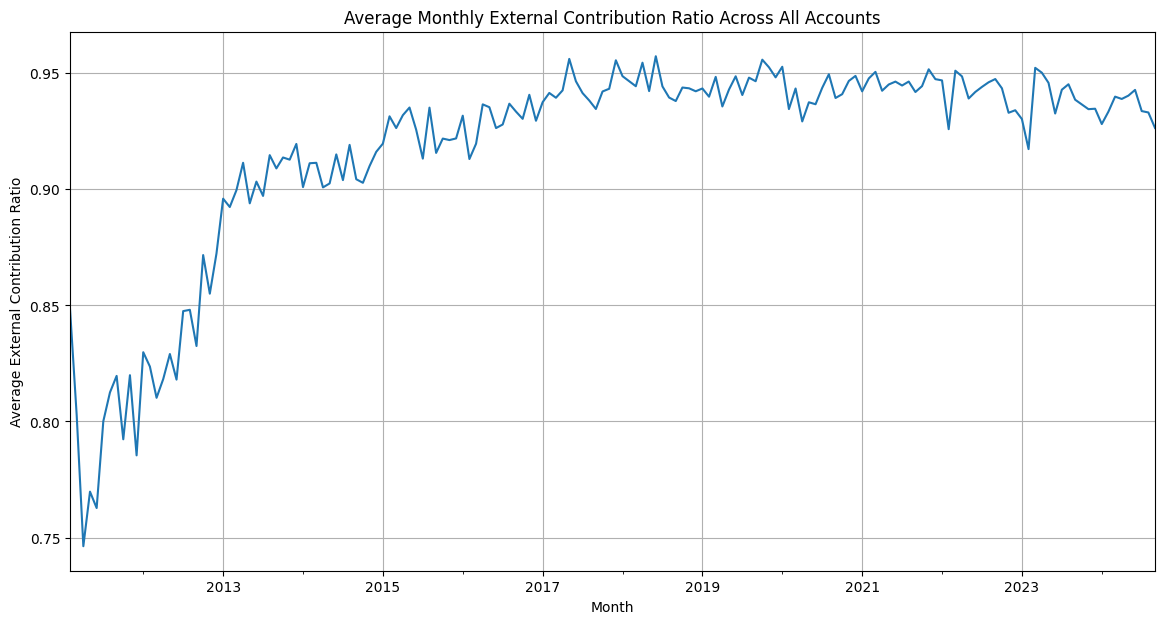

In [ ]:
monthly_avg_commit_count = df_account_level['aggregate_commit_count'].resample('M').mean()

monthly_avg_pr_accepted = df_account_level['pull_request_accepted_count'].resample('M').mean()

monthly_avg_issues_created = df_account_level['issues_created_count'].resample('M').mean()

monthly_avg_issues_closed = df_account_level['issues_closed_count'].resample('M').mean()

monthly_avg_fork_count = df_account_level['fork_count'].resample('M').mean()

monthly_avg_star_count = df_account_level['star_count'].resample('M').mean()

monthly_avg_releases = df_account_level['releases_count'].resample('M').mean()

monthly_avg_external_contribution = df_account_level['external_contribution_ratio'].resample('M').mean()

plt.figure(figsize=(14, 7))
monthly_avg_commit_count.plot(title='Average Monthly Commit Count Across All Accounts')
plt.xlabel('Month')
plt.ylabel('Average Commits')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 7))
monthly_avg_pr_accepted.plot(title='Average Monthly Pull Requests Accepted Across All Accounts')
plt.xlabel('Month')
plt.ylabel('Average PRs Accepted')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 7))
monthly_avg_issues_created.plot(label='Average Issues Created')
monthly_avg_issues_closed.plot(label='Average Issues Closed')
plt.title('Average Monthly Issues Created and Closed Across All Accounts')
plt.xlabel('Month')
plt.ylabel('Average Issue Count')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 7))
monthly_avg_fork_count.plot(label='Average Forks')
monthly_avg_star_count.plot(label='Average Stars')
plt.title('Average Monthly Fork and Star Count Across All Accounts')
plt.xlabel('Month')
plt.ylabel('Average Count')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 7))
monthly_avg_releases.plot(title='Average Monthly Releases Across All Accounts')
plt.xlabel('Month')
plt.ylabel('Average Releases')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 7))
monthly_avg_external_contribution.plot(title='Average Monthly External Contribution Ratio Across All Accounts')
plt.xlabel('Month')
plt.ylabel('Average External Contribution Ratio')
plt.grid(True)
plt.show()